<a href="https://colab.research.google.com/github/arimitramaiti/notebooks/blob/master/Group3_Assignment2_Basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### <center>Clustering Bank Data Example in Jupyter</center>
<center>Machine Learning with Big Data (Week-2)</center>
<center>ePGD ABA 2020-21</center>

In [ ]:
!pip install --quiet feature_engine
!pip install --quiet feature_engine --upgrade --no-deps
!pip install --quiet sklearn
!pip install --quiet sklearn --upgrade --no-deps
!pip install --quiet kmodes
!pip install --quiet pyclustering

     |████████████████████████████████| 9.5MB 7.2MB/s 
     |████████████████████████████████| 2.6MB 6.3MB/s 


In [ ]:
!pip install --quiet gower

In [ ]:
import timeit
start_time = timeit.default_timer()

**CAUTION: This notebook may consume 15-20 minutes to finish the output computations**

**Group-3 includes : Nitin Raheja, Rohan Singh, Anand Dattani, Anand Aggarwal and Arimitra Maiti**

**Week-2 : Clustering Exercise-C on Bank Data**

__Overall approach__

![](https://drive.google.com/uc?export=view&id=16W4VkbQruX9ivARxdslJUAUPYaYOt1hu)

**Q1) What is the total number of clusters (K) for each of the dataset? How did you determine the number of clusters?**

![](https://drive.google.com/uc?export=view&id=1ZEGpjqVXshERMZfX9j9lGLeF-4AE9vAu)

![](https://drive.google.com/uc?export=view&id=1b5ISg_lCnC-C1Y81adrjNwNJsFr2_X7y)

**Q2) What cluster analysis method is the most appropriate? On what basis would you choose a particular clustering algorithm over others.**

![](https://drive.google.com/uc?export=view&id=1EZ4C4_wuXF7CP8C6t9yxwwKwl1P4Oc-d)

![](https://drive.google.com/uc?export=view&id=1M85UiBO8v3wHoeR3FPrRh0Qt6rPANIfS)

**Q3) How would you evaluate the performance of the identified clusters?**

![](https://drive.google.com/uc?export=view&id=1h11KAFXIGJAELjENaHQymh3WgLPLcapI)

**Q4) How would you visualize cluster analysis results to make meaningful decisions, especially when the dimensionality is more than 3?**

![](https://drive.google.com/uc?export=view&id=13ugFV9H3P4p7SrZG2-GmeBRP4OltV8A2)

**Q5) What are the characteristics of the identified clusters?**

![](https://drive.google.com/uc?export=view&id=1wGBGcuWrf17Eg01gemkLmGsAaTnVxUW-)

![](https://drive.google.com/uc?export=view&id=1aYc9rui1x23a7wF8iP3Fu2l6XrkQ1xIn)

In [ ]:
#Import basic modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats
import math
import statsmodels.api as sm

In [ ]:
from feature_engine.categorical_encoders import RareLabelCategoricalEncoder
from feature_engine.discretisers import EqualFrequencyDiscretiser
from feature_engine.categorical_encoders import OrdinalCategoricalEncoder

In [ ]:
import gower

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score, v_measure_score, davies_bouldin_score
from scipy.spatial.distance import pdist

In [ ]:
from kmodes.kmodes import KModes

In [ ]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

In [ ]:
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.cluster.silhouette import silhouette
from pyclustering.cluster.encoder import type_encoding, cluster_encoder
from pyclustering.utils.metric import type_metric, distance_metric

In [ ]:
#Import data
url = "https://raw.githubusercontent.com/arimitramaiti/datasets/master/articles/cluster-dataset-C.csv"
dataset = pd.read_csv(url, error_bad_lines=False, header=0, index_col=None)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
dataset.head()

,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,AMOUNT,SAV_ACCT,EMPLOYMENT,INSTALL_RATE,MALE_DIV,MALE_SINGLE,MALE_MAR_or_WID,CO-APPLICANT,GUARANTOR,PRESENT_RESIDENT,REAL_ESTATE,PROP_UNKN_NONE,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN
0,0,6,4,0,0,0,1,0,0,1169,4,4,4,0,1,0,0,0,4,1,0,67,0,0,1,2,2,1,1,0
1,3,12,4,0,0,0,0,1,0,2096,0,3,2,0,1,0,0,0,3,1,0,49,0,0,1,1,1,2,0,0
2,0,42,2,0,0,1,0,0,0,7882,0,3,2,0,1,0,0,1,4,0,0,45,0,0,0,1,2,2,0,0
3,3,36,2,0,0,0,0,1,0,9055,4,2,2,0,1,0,0,0,4,0,1,35,0,0,0,1,1,2,1,0
4,3,24,2,0,0,1,0,0,0,2835,2,4,3,0,1,0,0,0,4,0,0,53,0,0,1,1,2,1,0,0


In [ ]:
# Checking Null values
dataset.isnull().sum()*100/dataset.shape[0]

CHK_ACCT            0.0
DURATION            0.0
HISTORY             0.0
NEW_CAR             0.0
USED_CAR            0.0
FURNITURE           0.0
RADIO/TV            0.0
EDUCATION           0.0
RETRAINING          0.0
AMOUNT              0.0
SAV_ACCT            0.0
EMPLOYMENT          0.0
INSTALL_RATE        0.0
MALE_DIV            0.0
MALE_SINGLE         0.0
MALE_MAR_or_WID     0.0
CO-APPLICANT        0.0
GUARANTOR           0.0
PRESENT_RESIDENT    0.0
REAL_ESTATE         0.0
PROP_UNKN_NONE      0.0
AGE                 0.0
OTHER_INSTALL       0.0
RENT                0.0
OWN_RES             0.0
NUM_CREDITS         0.0
JOB                 0.0
NUM_DEPENDENTS      0.0
TELEPHONE           0.0
FOREIGN             0.0
dtype: float64

In [ ]:
dataset.describe()

,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,AMOUNT,SAV_ACCT,EMPLOYMENT,INSTALL_RATE,MALE_DIV,MALE_SINGLE,MALE_MAR_or_WID,CO-APPLICANT,GUARANTOR,PRESENT_RESIDENT,REAL_ESTATE,PROP_UNKN_NONE,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.577000,20.903000,2.54500,0.234000,0.103000,0.181000,0.280000,0.050000,0.097000,3271.258000,1.105000,2.384000,2.973000,0.050000,0.54800,0.092000,0.041000,0.052000,2.845000,0.282000,0.154000,35.546000,0.186000,0.179000,0.713000,1.407000,1.904000,1.155000,0.404000,0.037000
std,1.257638,12.058814,1.08312,0.423584,0.304111,0.385211,0.449224,0.218054,0.296106,2822.736876,1.580023,1.208306,1.118715,0.218054,0.49794,0.289171,0.198389,0.222138,1.103718,0.450198,0.361129,11.375469,0.389301,0.383544,0.452588,0.577654,0.653614,0.362086,0.490943,0.188856
min,0.000000,4.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,250.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,12.000000,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1365.500000,0.000000,2.000000,2.000000,0.000000,0.00000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,27.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,0.000000,0.000000
50%,1.000000,18.000000,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2319.500000,0.000000,2.000000,3.000000,0.000000,1.00000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,33.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000
75%,3.000000,24.000000,4.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3972.250000,2.000000,4.000000,4.000000,0.000000,1.00000,0.000000,0.000000,0.000000,4.000000,1.000000,0.000000,42.000000,0.000000,0.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000
max,3.000000,72.000000,4.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18424.000000,4.000000,4.000000,4.000000,1.000000,1.00000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,75.000000,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000,1.000000,1.000000


__Concluding data exploration__

1. 39% of customers have checking account status-3 with the bank, compared to 54% of status-1&2 customers
2. Customers seem to have a right-skewed credit duration where mean (20 months) is greater than median (18 months)
3. More than 50% of both customers have credit history status-2 followed by 29% of status-5
4. 23% of customers have taken credit mentioning purchase of new car
5. Only 10% of customers have taken credit mentioning purchase of Used car
6. 18% of customers have taken credit mentioning purchase of new furniture
7. 28% of customers have taken credit mentioning purchase of Radio or Television
8. Only 5% of customers have taken credit to pursue education
9. Only 10% of customers have taken credit to pursue Retraining
10. On an average customers take 3271 units of credit currency which is right skewed and mean is greater than media (2320)
11. 60% of customers have their savings a/c status as status-0
12. 34% of customers have work experience status-2 followed by 25% of status-4
13. On an average customers have 3% installment rate, looks to be left-skewed but mean is same as median
14. Only 5% of customers are male as well as divorced
15. Approximately 55% of customers are male as well as single
16. Approximately 9% of customers are male as well as married or widow
17. Only 4% customers have a co-applicant while taking credit from bank
18. 5% of credit customers have Guarantor while taking credit
19. Around 41% of customers have residing status-4 and 31% have status-2 in the location mentioned
20. Around 28% customers own real estate
21. Around 15% of customers' property can be identified by bank
22. Age distribution of customers looks right skewed where mean (36 years) is higher than median (33 years)
23. 19% of customers have other credit engagements apart from the current loan in question
24. 18% of customers also stay on rent
25. 71% of customers applied from own residence
26. Customers have 1.5 other existing credits at the bank, distribution is right skewed
27. 63% of customers skill status-2
28. 16% customers have 2 members to look after as dependent, remaining 84% have 1 dependent member to look after
29. Surprisingly 40% of customers do not have a telephone connection directly under his/her name
30. A very small portion of (~3.5%) customers are required to work from foreign countries

__Distribution Plot__

In [ ]:
dataset.rename(columns = {'RADIO/TV':'RADIO_TV',
                         'CO-APPLICANT':'CO_APPLICANT'}, inplace = True)

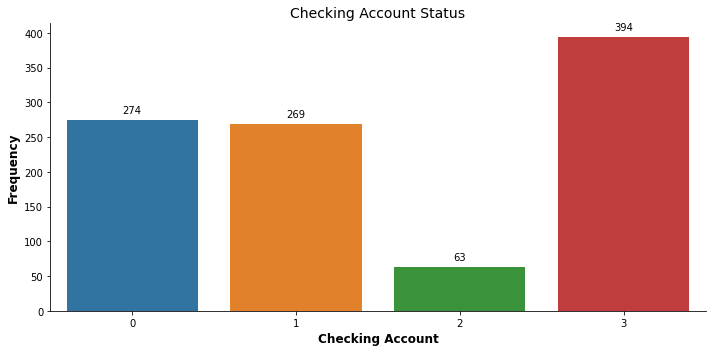

In [ ]:
fig, axes = plt.subplots(figsize=(10,5))
fig.subplots_adjust(top=0.7)
splot = sns.countplot(x='CHK_ACCT', data=dataset, ax=axes);
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_title('Checking Account Status', fontsize=14)
axes.set_xlabel('Checking Account', fontsize=12, weight='bold')
axes.set_ylabel('Frequency', fontsize=12, weight='bold')
# axes.set_xticklabels(['<0DM', '0-200DM', '>200DM', 'No A/C'], fontsize=11)
##Source Code: Start
##Link : https://github.com/mwaskom/seaborn/issues/1582
for p in splot.patches:
    splot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2.,
         p.get_height()), ha = 'center', va = 'center',
        xytext = (0, 10), textcoords = 'offset points')
##Source Code: End
# axes.legend(loc='best', shadow=True,fontsize='medium')
fig.tight_layout()
plt.show()

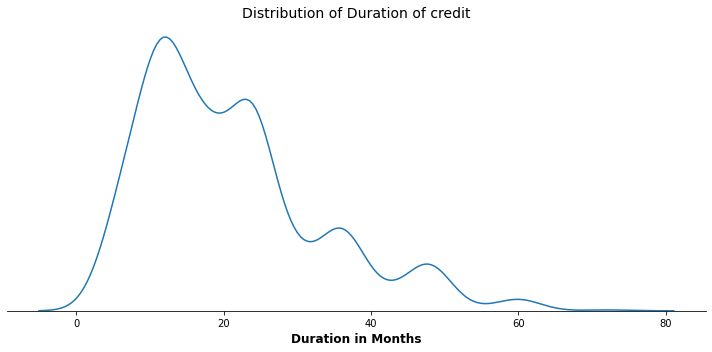

In [ ]:
fig, axes = plt.subplots(figsize=(10,5))
fig.subplots_adjust(top=0.7)
sns.kdeplot(dataset.DURATION, ax=axes);
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.spines['left'].set_visible(False)
axes.axes.get_yaxis().set_visible(False)
axes.set_title('Distribution of Duration of credit', fontsize=14)
axes.set_xlabel('Duration in Months', fontsize=12, weight='bold')
# axes.legend(loc='best', shadow=True,fontsize='medium')
fig.tight_layout()
plt.show()

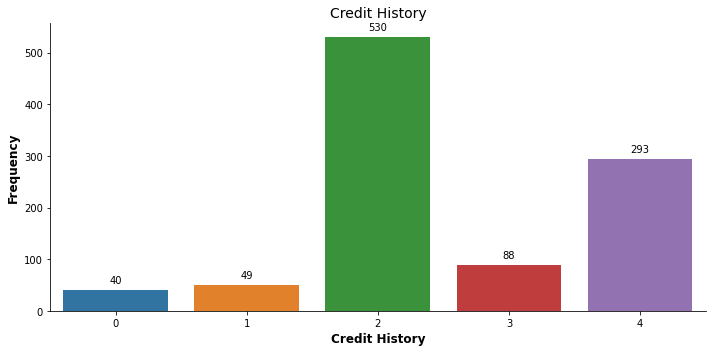

In [ ]:
fig, axes = plt.subplots(figsize=(10,5))
fig.subplots_adjust(top=0.7)
splot = sns.countplot(x='HISTORY', data=dataset, ax=axes);
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_title('Credit History', fontsize=14)
axes.set_xlabel('Credit History', fontsize=12, weight='bold')
axes.set_ylabel('Frequency', fontsize=12, weight='bold')
##Source Code: Start
##Link : https://github.com/mwaskom/seaborn/issues/1582
for p in splot.patches:
    splot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2.,
         p.get_height()), ha = 'center', va = 'center',
        xytext = (0, 10), textcoords = 'offset points')
##Source Code: End
fig.tight_layout()
plt.show()

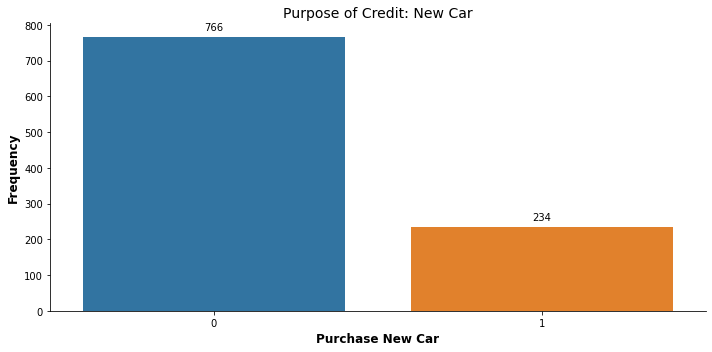

In [ ]:
fig, axes = plt.subplots(figsize=(10,5))
fig.subplots_adjust(top=0.7)
splot = sns.countplot(x='NEW_CAR', data=dataset, ax=axes);
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_title('Purpose of Credit: New Car', fontsize=14)
axes.set_xlabel('Purchase New Car', fontsize=12, weight='bold')
axes.set_ylabel('Frequency', fontsize=12, weight='bold')
##Source Code: Start
##Link : https://github.com/mwaskom/seaborn/issues/1582
for p in splot.patches:
    splot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2.,
         p.get_height()), ha = 'center', va = 'center',
        xytext = (0, 10), textcoords = 'offset points')
##Source Code: End
fig.tight_layout()
plt.show()

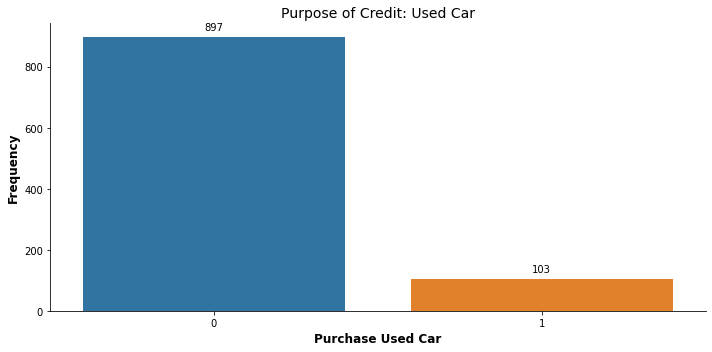

In [ ]:
fig, axes = plt.subplots(figsize=(10,5))
fig.subplots_adjust(top=0.7)
splot = sns.countplot(x='USED_CAR', data=dataset, ax=axes);
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_title('Purpose of Credit: Used Car', fontsize=14)
axes.set_xlabel('Purchase Used Car', fontsize=12, weight='bold')
axes.set_ylabel('Frequency', fontsize=12, weight='bold')
##Source Code: Start
##Link : https://github.com/mwaskom/seaborn/issues/1582
for p in splot.patches:
    splot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2.,
         p.get_height()), ha = 'center', va = 'center',
        xytext = (0, 10), textcoords = 'offset points')
##Source Code: End
fig.tight_layout()
plt.show()

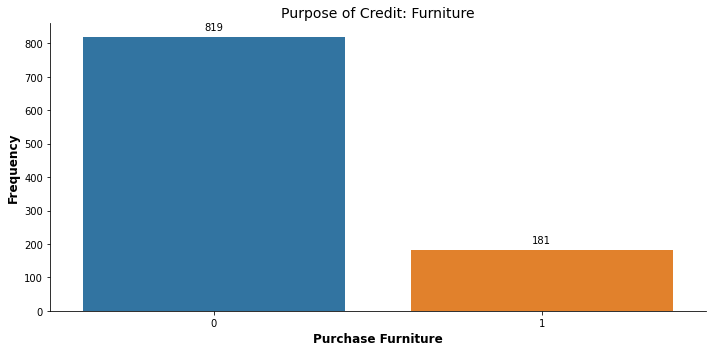

In [ ]:
fig, axes = plt.subplots(figsize=(10,5))
fig.subplots_adjust(top=0.7)
splot = sns.countplot(x='FURNITURE', data=dataset, ax=axes);
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_title('Purpose of Credit: Furniture', fontsize=14)
axes.set_xlabel('Purchase Furniture', fontsize=12, weight='bold')
axes.set_ylabel('Frequency', fontsize=12, weight='bold')
##Source Code: Start
##Link : https://github.com/mwaskom/seaborn/issues/1582
for p in splot.patches:
    splot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2.,
         p.get_height()), ha = 'center', va = 'center',
        xytext = (0, 10), textcoords = 'offset points')
##Source Code: End
fig.tight_layout()
plt.show()

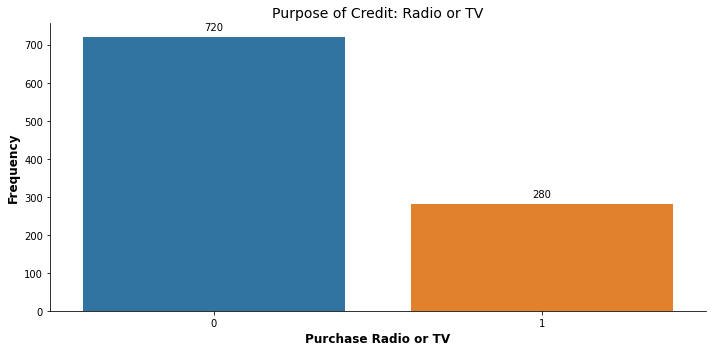

In [ ]:
fig, axes = plt.subplots(figsize=(10,5))
fig.subplots_adjust(top=0.7)
splot = sns.countplot(x='RADIO_TV', data=dataset, ax=axes);
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_title('Purpose of Credit: Radio or TV', fontsize=14)
axes.set_xlabel('Purchase Radio or TV', fontsize=12, weight='bold')
axes.set_ylabel('Frequency', fontsize=12, weight='bold')
##Source Code: Start
##Link : https://github.com/mwaskom/seaborn/issues/1582
for p in splot.patches:
    splot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2.,
         p.get_height()), ha = 'center', va = 'center',
        xytext = (0, 10), textcoords = 'offset points')
##Source Code: End
fig.tight_layout()
plt.show()

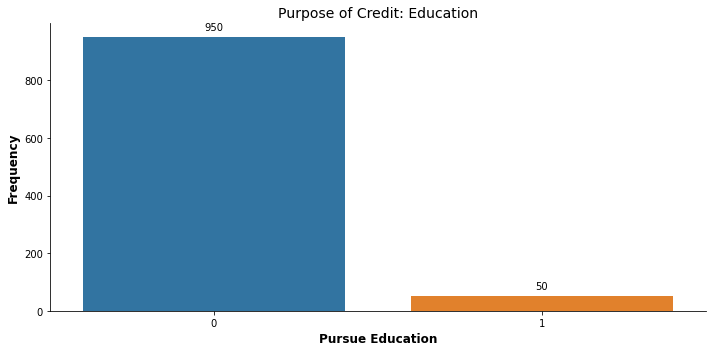

In [ ]:
fig, axes = plt.subplots(figsize=(10,5))
fig.subplots_adjust(top=0.7)
splot = sns.countplot(x='EDUCATION', data=dataset, ax=axes);
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_title('Purpose of Credit: Education', fontsize=14)
axes.set_xlabel('Pursue Education', fontsize=12, weight='bold')
axes.set_ylabel('Frequency', fontsize=12, weight='bold')
##Source Code: Start
##Link : https://github.com/mwaskom/seaborn/issues/1582
for p in splot.patches:
    splot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2.,
         p.get_height()), ha = 'center', va = 'center',
        xytext = (0, 10), textcoords = 'offset points')
##Source Code: End
fig.tight_layout()
plt.show()

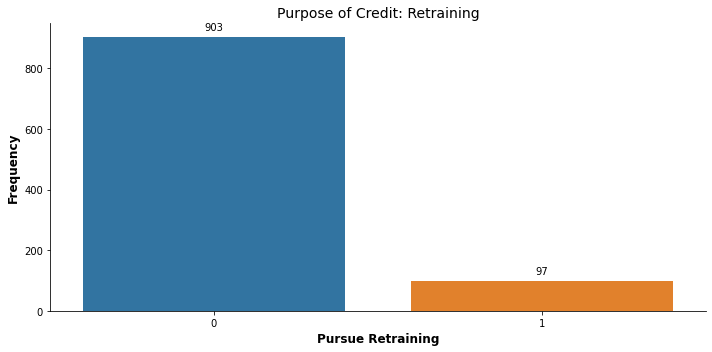

In [ ]:
fig, axes = plt.subplots(figsize=(10,5))
fig.subplots_adjust(top=0.7)
splot = sns.countplot(x='RETRAINING', data=dataset, ax=axes);
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_title('Purpose of Credit: Retraining', fontsize=14)
axes.set_xlabel('Pursue Retraining', fontsize=12, weight='bold')
axes.set_ylabel('Frequency', fontsize=12, weight='bold')
##Source Code: Start
##Link : https://github.com/mwaskom/seaborn/issues/1582
for p in splot.patches:
    splot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2.,
         p.get_height()), ha = 'center', va = 'center',
        xytext = (0, 10), textcoords = 'offset points')
##Source Code: End
fig.tight_layout()
plt.show()

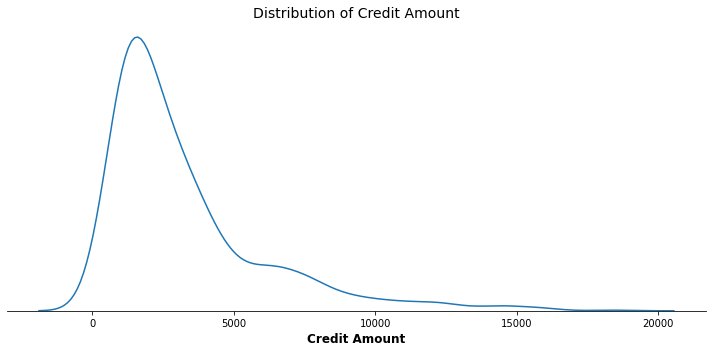

In [ ]:
fig, axes = plt.subplots(figsize=(10,5))
fig.subplots_adjust(top=0.7)
sns.kdeplot(dataset.AMOUNT, ax=axes);
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.spines['left'].set_visible(False)
axes.axes.get_yaxis().set_visible(False)
axes.set_title('Distribution of Credit Amount', fontsize=14)
axes.set_xlabel('Credit Amount', fontsize=12, weight='bold')
# axes.legend(loc='best', shadow=True,fontsize='medium')
fig.tight_layout()
plt.show()

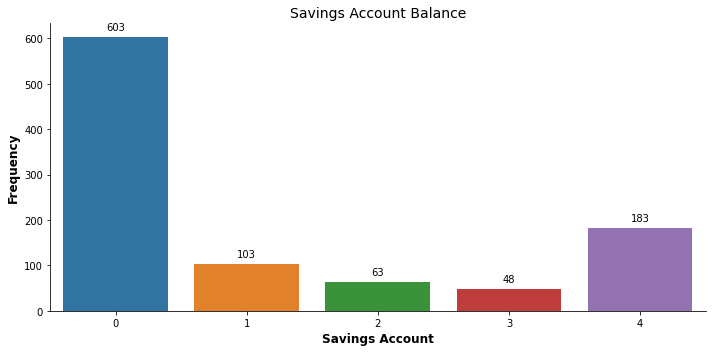

In [ ]:
fig, axes = plt.subplots(figsize=(10,5))
fig.subplots_adjust(top=0.7)
splot = sns.countplot(x='SAV_ACCT', data=dataset, ax=axes);
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_title('Savings Account Balance', fontsize=14)
axes.set_xlabel('Savings Account', fontsize=12, weight='bold')
axes.set_ylabel('Frequency', fontsize=12, weight='bold')
##Source Code: Start
##Link : https://github.com/mwaskom/seaborn/issues/1582
for p in splot.patches:
    splot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2.,
         p.get_height()), ha = 'center', va = 'center',
        xytext = (0, 10), textcoords = 'offset points')
##Source Code: End
fig.tight_layout()
plt.show()

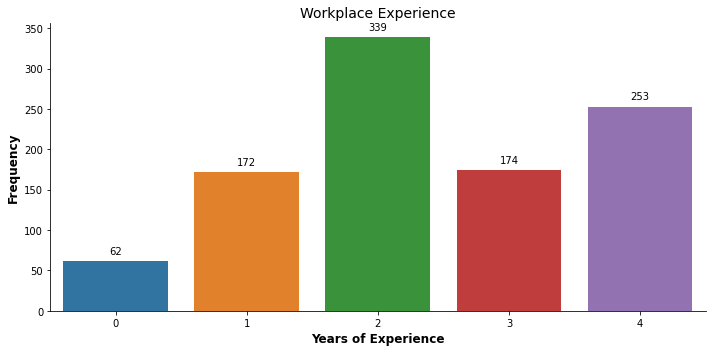

In [ ]:
fig, axes = plt.subplots(figsize=(10,5))
fig.subplots_adjust(top=0.7)
splot = sns.countplot(x='EMPLOYMENT', data=dataset, ax=axes);
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_title('Workplace Experience', fontsize=14)
axes.set_xlabel('Years of Experience', fontsize=12, weight='bold')
axes.set_ylabel('Frequency', fontsize=12, weight='bold')
##Source Code: Start
##Link : https://github.com/mwaskom/seaborn/issues/1582
for p in splot.patches:
    splot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2.,
         p.get_height()), ha = 'center', va = 'center',
        xytext = (0, 10), textcoords = 'offset points')
##Source Code: End
fig.tight_layout()
plt.show()

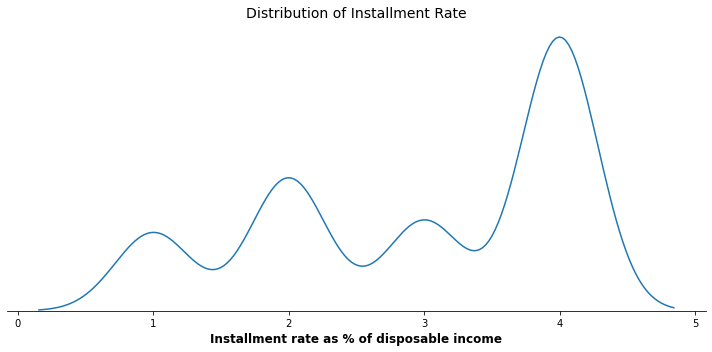

In [ ]:
fig, axes = plt.subplots(figsize=(10,5))
fig.subplots_adjust(top=0.7)
sns.kdeplot(dataset.INSTALL_RATE, ax=axes);
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.spines['left'].set_visible(False)
axes.axes.get_yaxis().set_visible(False)
axes.set_title('Distribution of Installment Rate', fontsize=14)
axes.set_xlabel('Installment rate as % of disposable income', fontsize=12, weight='bold')
# axes.legend(loc='best', shadow=True,fontsize='medium')
fig.tight_layout()
plt.show()

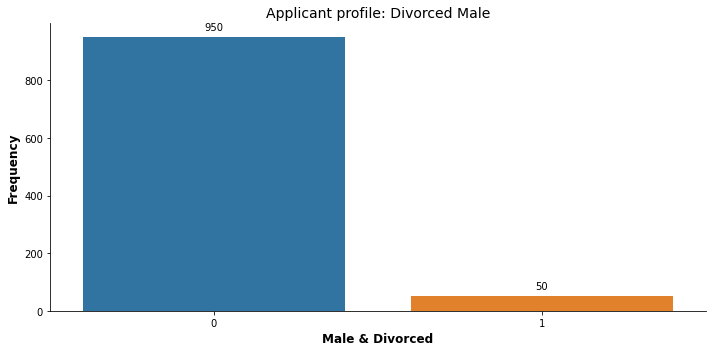

In [ ]:
fig, axes = plt.subplots(figsize=(10,5))
fig.subplots_adjust(top=0.7)
splot = sns.countplot(x='MALE_DIV', data=dataset, ax=axes);
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_title('Applicant profile: Divorced Male', fontsize=14)
axes.set_xlabel('Male & Divorced', fontsize=12, weight='bold')
axes.set_ylabel('Frequency', fontsize=12, weight='bold')
##Source Code: Start
##Link : https://github.com/mwaskom/seaborn/issues/1582
for p in splot.patches:
    splot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2.,
         p.get_height()), ha = 'center', va = 'center',
        xytext = (0, 10), textcoords = 'offset points')
##Source Code: End
fig.tight_layout()
plt.show()

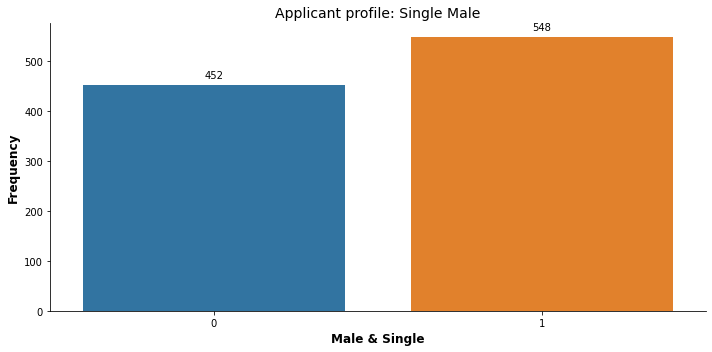

In [ ]:
fig, axes = plt.subplots(figsize=(10,5))
fig.subplots_adjust(top=0.7)
splot = sns.countplot(x='MALE_SINGLE', data=dataset, ax=axes);
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_title('Applicant profile: Single Male', fontsize=14)
axes.set_xlabel('Male & Single', fontsize=12, weight='bold')
axes.set_ylabel('Frequency', fontsize=12, weight='bold')
##Source Code: Start
##Link : https://github.com/mwaskom/seaborn/issues/1582
for p in splot.patches:
    splot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2.,
         p.get_height()), ha = 'center', va = 'center',
        xytext = (0, 10), textcoords = 'offset points')
##Source Code: End
fig.tight_layout()
plt.show()

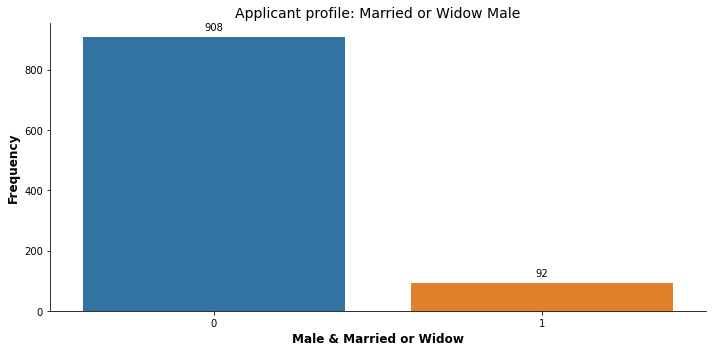

In [ ]:
fig, axes = plt.subplots(figsize=(10,5))
fig.subplots_adjust(top=0.7)
splot = sns.countplot(x='MALE_MAR_or_WID', data=dataset, ax=axes);
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_title('Applicant profile: Married or Widow Male', fontsize=14)
axes.set_xlabel('Male & Married or Widow', fontsize=12, weight='bold')
axes.set_ylabel('Frequency', fontsize=12, weight='bold')
##Source Code: Start
##Link : https://github.com/mwaskom/seaborn/issues/1582
for p in splot.patches:
    splot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2.,
         p.get_height()), ha = 'center', va = 'center',
        xytext = (0, 10), textcoords = 'offset points')
##Source Code: End
fig.tight_layout()
plt.show()

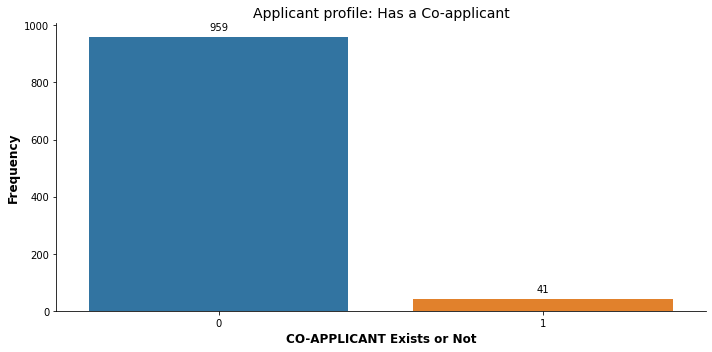

In [ ]:
fig, axes = plt.subplots(figsize=(10,5))
fig.subplots_adjust(top=0.7)
splot = sns.countplot(x='CO_APPLICANT', data=dataset, ax=axes);
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_title('Applicant profile: Has a Co-applicant', fontsize=14)
axes.set_xlabel('CO-APPLICANT Exists or Not', fontsize=12, weight='bold')
axes.set_ylabel('Frequency', fontsize=12, weight='bold')
##Source Code: Start
##Link : https://github.com/mwaskom/seaborn/issues/1582
for p in splot.patches:
    splot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2.,
         p.get_height()), ha = 'center', va = 'center',
        xytext = (0, 10), textcoords = 'offset points')
##Source Code: End
fig.tight_layout()
plt.show()

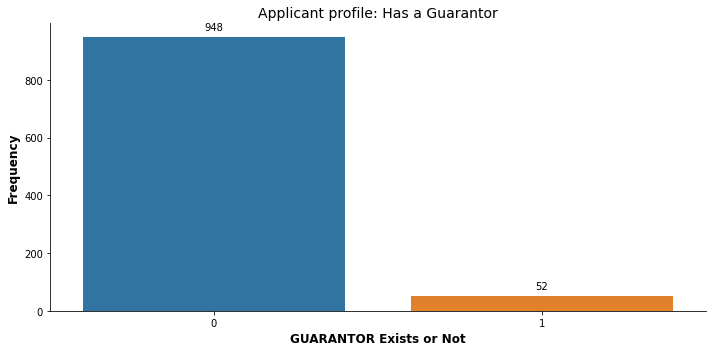

In [ ]:
fig, axes = plt.subplots(figsize=(10,5))
fig.subplots_adjust(top=0.7)
splot = sns.countplot(x='GUARANTOR', data=dataset, ax=axes);
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_title('Applicant profile: Has a Guarantor', fontsize=14)
axes.set_xlabel('GUARANTOR Exists or Not', fontsize=12, weight='bold')
axes.set_ylabel('Frequency', fontsize=12, weight='bold')
##Source Code: Start
##Link : https://github.com/mwaskom/seaborn/issues/1582
for p in splot.patches:
    splot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2.,
         p.get_height()), ha = 'center', va = 'center',
        xytext = (0, 10), textcoords = 'offset points')
##Source Code: End
fig.tight_layout()
plt.show()

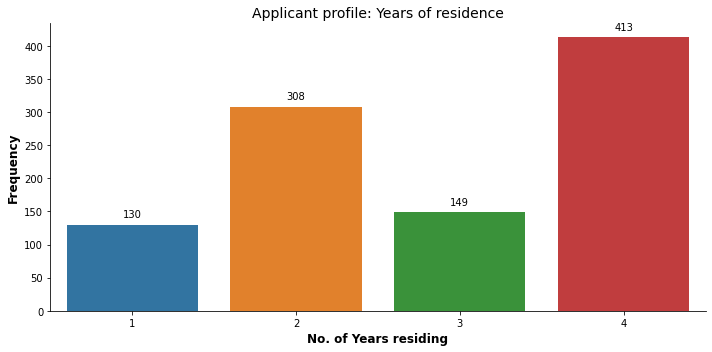

In [ ]:
fig, axes = plt.subplots(figsize=(10,5))
fig.subplots_adjust(top=0.7)
splot = sns.countplot(x='PRESENT_RESIDENT', data=dataset, ax=axes);
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_title('Applicant profile: Years of residence', fontsize=14)
axes.set_xlabel('No. of Years residing', fontsize=12, weight='bold')
axes.set_ylabel('Frequency', fontsize=12, weight='bold')
##Source Code: Start
##Link : https://github.com/mwaskom/seaborn/issues/1582
for p in splot.patches:
    splot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2.,
         p.get_height()), ha = 'center', va = 'center',
        xytext = (0, 10), textcoords = 'offset points')
##Source Code: End
fig.tight_layout()
plt.show()

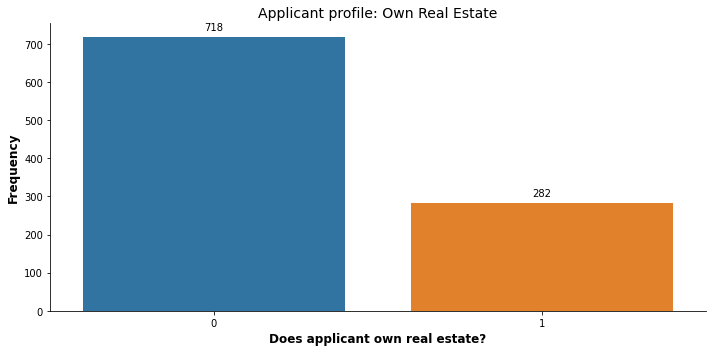

In [ ]:
fig, axes = plt.subplots(figsize=(10,5))
fig.subplots_adjust(top=0.7)
splot = sns.countplot(x='REAL_ESTATE', data=dataset, ax=axes);
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_title('Applicant profile: Own Real Estate', fontsize=14)
axes.set_xlabel('Does applicant own real estate?', fontsize=12, weight='bold')
axes.set_ylabel('Frequency', fontsize=12, weight='bold')
##Source Code: Start
##Link : https://github.com/mwaskom/seaborn/issues/1582
for p in splot.patches:
    splot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2.,
         p.get_height()), ha = 'center', va = 'center',
        xytext = (0, 10), textcoords = 'offset points')
##Source Code: End
fig.tight_layout()
plt.show()

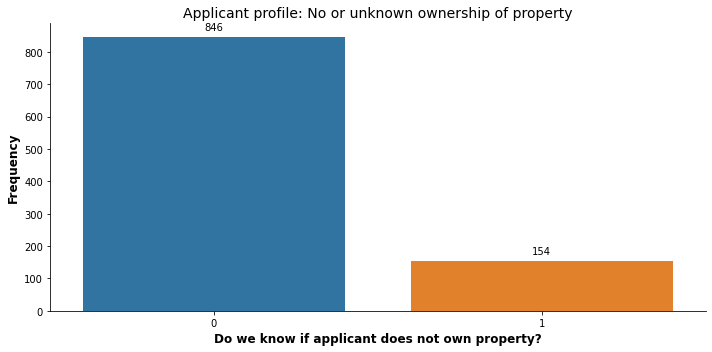

In [ ]:
fig, axes = plt.subplots(figsize=(10,5))
fig.subplots_adjust(top=0.7)
splot = sns.countplot(x='PROP_UNKN_NONE', data=dataset, ax=axes);
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_title('Applicant profile: No or unknown ownership of property', fontsize=14)
axes.set_xlabel('Do we know if applicant does not own property?', fontsize=12, weight='bold')
axes.set_ylabel('Frequency', fontsize=12, weight='bold')
##Source Code: Start
##Link : https://github.com/mwaskom/seaborn/issues/1582
for p in splot.patches:
    splot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2.,
         p.get_height()), ha = 'center', va = 'center',
        xytext = (0, 10), textcoords = 'offset points')
##Source Code: End
fig.tight_layout()
plt.show()

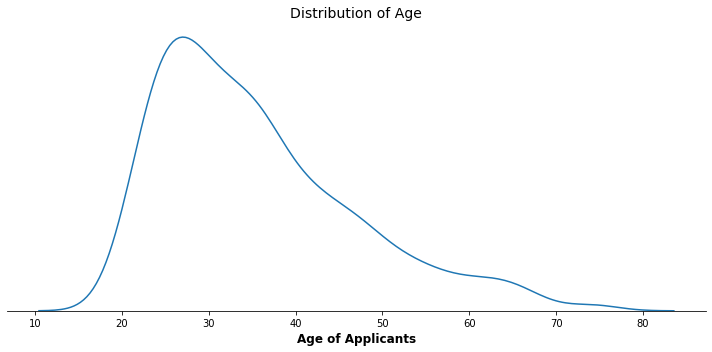

In [ ]:
fig, axes = plt.subplots(figsize=(10,5))
fig.subplots_adjust(top=0.7)
sns.kdeplot(dataset.AGE, ax=axes);
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.spines['left'].set_visible(False)
axes.axes.get_yaxis().set_visible(False)
axes.set_title('Distribution of Age', fontsize=14)
axes.set_xlabel('Age of Applicants', fontsize=12, weight='bold')
# axes.legend(loc='best', shadow=True,fontsize='medium')
fig.tight_layout()
plt.show()

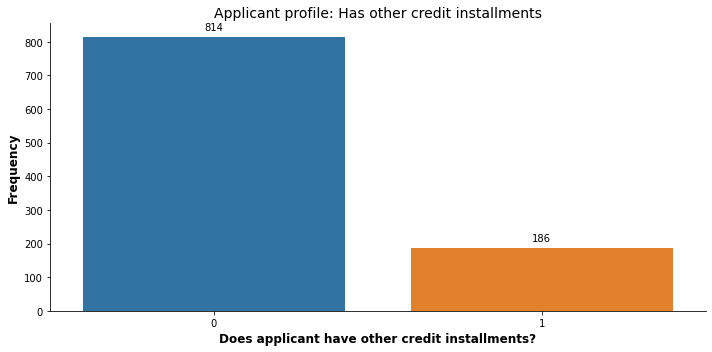

In [ ]:
fig, axes = plt.subplots(figsize=(10,5))
fig.subplots_adjust(top=0.7)
splot = sns.countplot(x='OTHER_INSTALL', data=dataset, ax=axes);
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_title('Applicant profile: Has other credit installments', fontsize=14)
axes.set_xlabel('Does applicant have other credit installments?', fontsize=12, weight='bold')
axes.set_ylabel('Frequency', fontsize=12, weight='bold')
##Source Code: Start
##Link : https://github.com/mwaskom/seaborn/issues/1582
for p in splot.patches:
    splot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2.,
         p.get_height()), ha = 'center', va = 'center',
        xytext = (0, 10), textcoords = 'offset points')
##Source Code: End
fig.tight_layout()
plt.show()

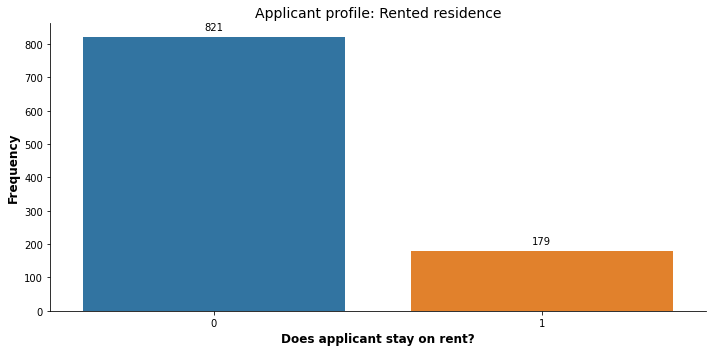

In [ ]:
fig, axes = plt.subplots(figsize=(10,5))
fig.subplots_adjust(top=0.7)
splot = sns.countplot(x='RENT', data=dataset, ax=axes);
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_title('Applicant profile: Rented residence', fontsize=14)
axes.set_xlabel('Does applicant stay on rent?', fontsize=12, weight='bold')
axes.set_ylabel('Frequency', fontsize=12, weight='bold')
##Source Code: Start
##Link : https://github.com/mwaskom/seaborn/issues/1582
for p in splot.patches:
    splot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2.,
         p.get_height()), ha = 'center', va = 'center',
        xytext = (0, 10), textcoords = 'offset points')
##Source Code: End
fig.tight_layout()
plt.show()

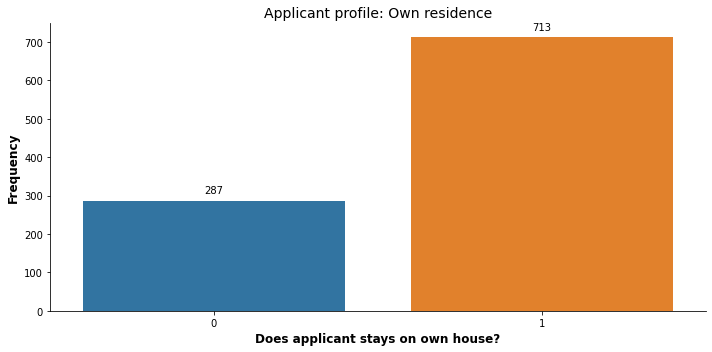

In [ ]:
fig, axes = plt.subplots(figsize=(10,5))
fig.subplots_adjust(top=0.7)
splot = sns.countplot(x='OWN_RES', data=dataset, ax=axes);
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_title('Applicant profile: Own residence', fontsize=14)
axes.set_xlabel('Does applicant stays on own house?', fontsize=12, weight='bold')
axes.set_ylabel('Frequency', fontsize=12, weight='bold')
##Source Code: Start
##Link : https://github.com/mwaskom/seaborn/issues/1582
for p in splot.patches:
    splot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2.,
         p.get_height()), ha = 'center', va = 'center',
        xytext = (0, 10), textcoords = 'offset points')
##Source Code: End
fig.tight_layout()
plt.show()

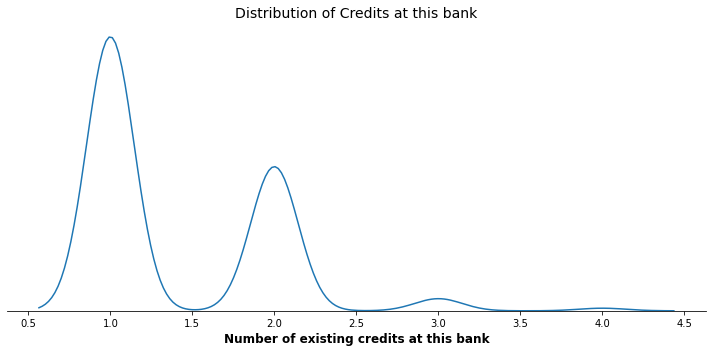

In [ ]:
fig, axes = plt.subplots(figsize=(10,5))
fig.subplots_adjust(top=0.7)
sns.kdeplot(dataset.NUM_CREDITS, ax=axes);
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.spines['left'].set_visible(False)
axes.axes.get_yaxis().set_visible(False)
axes.set_title('Distribution of Credits at this bank', fontsize=14)
axes.set_xlabel('Number of existing credits at this bank', fontsize=12, weight='bold')
# axes.legend(loc='best', shadow=True,fontsize='medium')
fig.tight_layout()
plt.show()

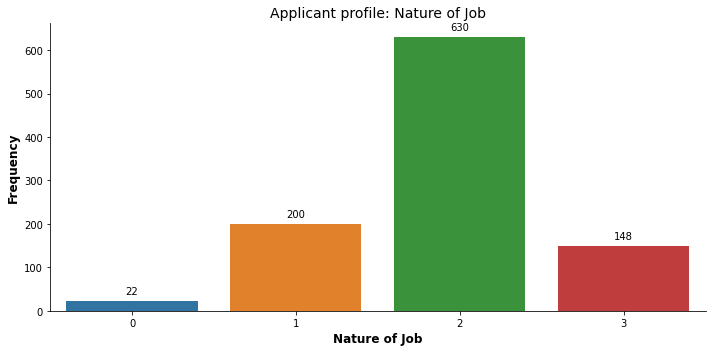

In [ ]:
fig, axes = plt.subplots(figsize=(10,5))
fig.subplots_adjust(top=0.7)
splot = sns.countplot(x='JOB', data=dataset, ax=axes);
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_title('Applicant profile: Nature of Job', fontsize=14)
axes.set_xlabel('Nature of Job', fontsize=12, weight='bold')
axes.set_ylabel('Frequency', fontsize=12, weight='bold')
##Source Code: Start
##Link : https://github.com/mwaskom/seaborn/issues/1582
for p in splot.patches:
    splot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2.,
         p.get_height()), ha = 'center', va = 'center',
        xytext = (0, 10), textcoords = 'offset points')
##Source Code: End
fig.tight_layout()
plt.show()

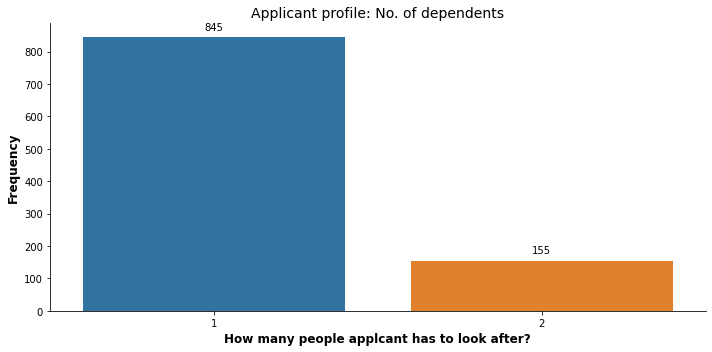

In [ ]:
fig, axes = plt.subplots(figsize=(10,5))
fig.subplots_adjust(top=0.7)
splot = sns.countplot(x='NUM_DEPENDENTS', data=dataset, ax=axes);
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_title('Applicant profile: No. of dependents', fontsize=14)
axes.set_xlabel('How many people applcant has to look after?', fontsize=12, weight='bold')
axes.set_ylabel('Frequency', fontsize=12, weight='bold')
##Source Code: Start
##Link : https://github.com/mwaskom/seaborn/issues/1582
for p in splot.patches:
    splot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2.,
         p.get_height()), ha = 'center', va = 'center',
        xytext = (0, 10), textcoords = 'offset points')
##Source Code: End
fig.tight_layout()
plt.show()

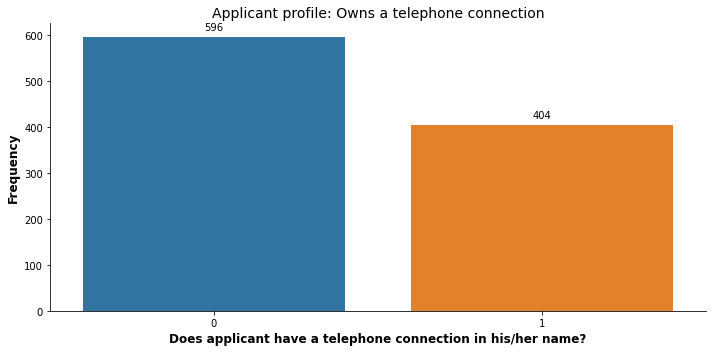

In [ ]:
fig, axes = plt.subplots(figsize=(10,5))
fig.subplots_adjust(top=0.7)
splot = sns.countplot(x='TELEPHONE', data=dataset, ax=axes);
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_title('Applicant profile: Owns a telephone connection', fontsize=14)
axes.set_xlabel('Does applicant have a telephone connection in his/her name?', fontsize=12, weight='bold')
axes.set_ylabel('Frequency', fontsize=12, weight='bold')
##Source Code: Start
##Link : https://github.com/mwaskom/seaborn/issues/1582
for p in splot.patches:
    splot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2.,
         p.get_height()), ha = 'center', va = 'center',
        xytext = (0, 10), textcoords = 'offset points')
##Source Code: End
fig.tight_layout()
plt.show()

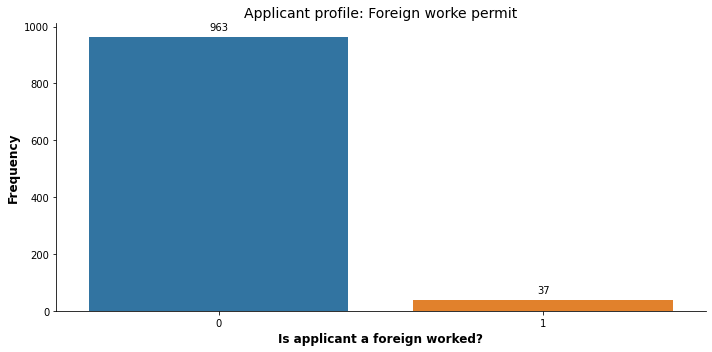

In [ ]:
fig, axes = plt.subplots(figsize=(10,5))
fig.subplots_adjust(top=0.7)
splot = sns.countplot(x='FOREIGN', data=dataset, ax=axes);
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_title('Applicant profile: Foreign worke permit', fontsize=14)
axes.set_xlabel('Is applicant a foreign worked?', fontsize=12, weight='bold')
axes.set_ylabel('Frequency', fontsize=12, weight='bold')
##Source Code: Start
##Link : https://github.com/mwaskom/seaborn/issues/1582
for p in splot.patches:
    splot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2.,
         p.get_height()), ha = 'center', va = 'center',
        xytext = (0, 10), textcoords = 'offset points')
##Source Code: End
fig.tight_layout()
plt.show()

In [ ]:
eqfdisctr1 = EqualFrequencyDiscretiser(q=20, variables = ['DURATION', 'AMOUNT', 'AGE'],
                                     return_object=True)

In [ ]:
eqfdisctr2 = EqualFrequencyDiscretiser(q=5, variables = ['INSTALL_RATE', 'NUM_CREDITS'],
                                     return_object=True)

In [ ]:
X = dataset.copy()

In [ ]:
eqfdisctr1.fit(X)

EqualFrequencyDiscretiser(q=20, return_boundaries=False, return_object=True,
                          variables=['DURATION', 'AMOUNT', 'AGE'])

In [ ]:
eqfdisctr2.fit(X)

EqualFrequencyDiscretiser(q=5, return_boundaries=False, return_object=True,
                          variables=['INSTALL_RATE', 'NUM_CREDITS'])

In [ ]:
X1 = eqfdisctr1.transform(X)

In [ ]:
X2 = eqfdisctr2.transform(X1)

In [ ]:
for i in range(len(X2.columns)):
    if X2[X2.columns[i]].dtype != 'object':
        X2[X2.columns[i]] = X2[X2.columns[i]].apply(lambda x: str(x))

In [ ]:
col_list = list(X2.columns)

In [ ]:
rare_label_encoder = RareLabelCategoricalEncoder(
    tol=0.01,
    n_categories=2,
    variables=col_list
)

In [ ]:
rare_label_encoder.fit(X2)

/usr/local/lib/python3.6/dist-packages/feature_engine/categorical_encoders.py:786: UserWarning: The number of unique categories for variable NEW_CAR is less than that indicated in n_categories. Thus, all categories will be considered frequent
  "n_categories. Thus, all categories will be considered frequent".format(var))
/usr/local/lib/python3.6/dist-packages/feature_engine/categorical_encoders.py:786: UserWarning: The number of unique categories for variable USED_CAR is less than that indicated in n_categories. Thus, all categories will be considered frequent
  "n_categories. Thus, all categories will be considered frequent".format(var))
/usr/local/lib/python3.6/dist-packages/feature_engine/categorical_encoders.py:786: UserWarning: The number of unique categories for variable FURNITURE is less than that indicated in n_categories. Thus, all categories will be considered frequent
  "n_categories. Thus, all categories will be considered frequent".format(var))
/usr/local/lib/python3.6/dis

RareLabelCategoricalEncoder(max_n_categories=None, n_categories=2,
                            replace_with='Rare', tol=0.01,
                            variables=['CHK_ACCT', 'DURATION', 'HISTORY',
                                       'NEW_CAR', 'USED_CAR', 'FURNITURE',
                                       'RADIO_TV', 'EDUCATION', 'RETRAINING',
                                       'AMOUNT', 'SAV_ACCT', 'EMPLOYMENT',
                                       'INSTALL_RATE', 'MALE_DIV',
                                       'MALE_SINGLE', 'MALE_MAR_or_WID',
                                       'CO_APPLICANT', 'GUARANTOR',
                                       'PRESENT_RESIDENT', 'REAL_ESTATE',
                                       'PROP_UNKN_NONE', 'AGE', 'OTHER_INSTALL',
                                       'RENT', 'OWN_RES', 'NUM_CREDITS', 'JOB',
                                       'NUM_DEPENDENTS', 'TELEPHONE',
                                       'FOREIGN'])

In [ ]:
X3 = rare_label_encoder.transform(X2)

In [ ]:
ordered_label_encoder = OrdinalCategoricalEncoder(
    encoding_method='arbitrary',
    variables=col_list)

In [ ]:
ordered_label_encoder.fit(X3)

OrdinalCategoricalEncoder(encoding_method='arbitrary',
                          variables=['CHK_ACCT', 'DURATION', 'HISTORY',
                                     'NEW_CAR', 'USED_CAR', 'FURNITURE',
                                     'RADIO_TV', 'EDUCATION', 'RETRAINING',
                                     'AMOUNT', 'SAV_ACCT', 'EMPLOYMENT',
                                     'INSTALL_RATE', 'MALE_DIV', 'MALE_SINGLE',
                                     'MALE_MAR_or_WID', 'CO_APPLICANT',
                                     'GUARANTOR', 'PRESENT_RESIDENT',
                                     'REAL_ESTATE', 'PROP_UNKN_NONE', 'AGE',
                                     'OTHER_INSTALL', 'RENT', 'OWN_RES',
                                     'NUM_CREDITS', 'JOB', 'NUM_DEPENDENTS',
                                     'TELEPHONE', 'FOREIGN'])

In [ ]:
# ordered_label_encoder.encoder_dict_
# ordered_label_encoder.variables
X4 = ordered_label_encoder.transform(X3)

**Gower Distance**

In [ ]:
store = []
for i in range(len(X4.columns)):
    a = True
    store.append(a)

In [ ]:
len(store)

30

In [ ]:
for i in range(len(X4.columns)):
    if X4[X4.columns[i]].dtype != 'float':
        X4[X4.columns[i]] = X4[X4.columns[i]].apply(lambda x: float(x))

In [ ]:
distance_matrix = gower.gower_matrix(X4, cat_features = store)

**Hierarchical Clustering**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  This is separate from the ipykernel package so we can avoid doing imports until


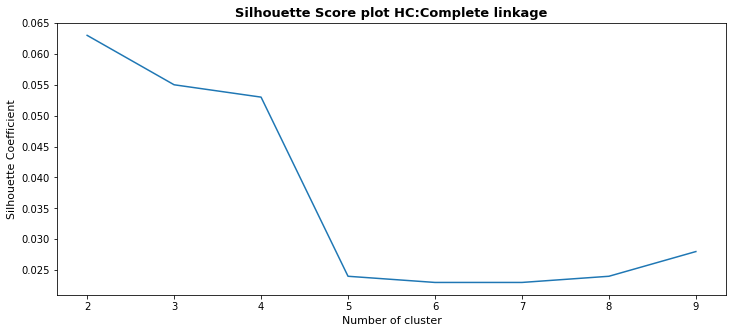

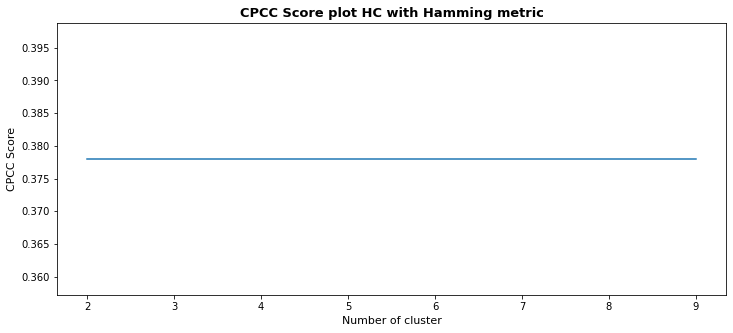

In [ ]:
sil_score = {}
cpcc = {}
Zd = sch.linkage(distance_matrix, method='complete', metric='hamming')

for k in range(2, 10):
    ##https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
    hc = AgglomerativeClustering(n_clusters=k, affinity='precomputed', linkage='complete').fit(distance_matrix)
    label = hc.labels_
    sil_score[k] = round(silhouette_score(distance_matrix, label, metric="precomputed"),3)
    ##https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html
    c, coph_dists = sch.cophenet(Zd, pdist(X4, metric="hamming"))
    cpcc[k] = round(c,3)

plt.figure(figsize=(12,5))
plt.plot(list(sil_score.keys()), list(sil_score.values()))
plt.xlabel("Number of cluster", fontsize=11)
plt.ylabel("Silhouette Coefficient", fontsize=11)
plt.title("Silhouette Score plot HC:Complete linkage", fontsize=13, weight='bold')

plt.figure(figsize=(12,5))
plt.plot(list(cpcc.keys()), list(cpcc.values()))
plt.xlabel("Number of cluster", fontsize=11)
plt.ylabel("CPCC Score", fontsize=11)
plt.title("CPCC Score plot HC with Hamming metric", fontsize=13, weight='bold')

plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  This is separate from the ipykernel package so we can avoid doing imports until


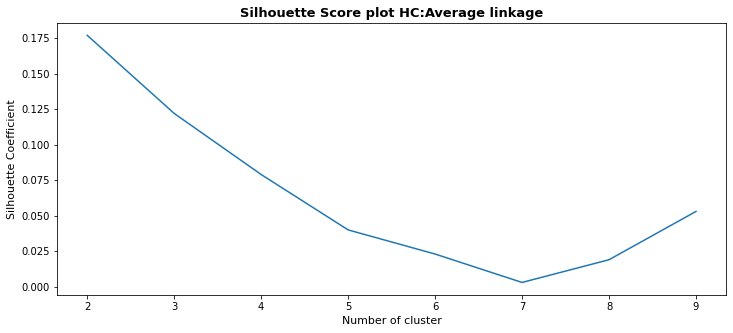

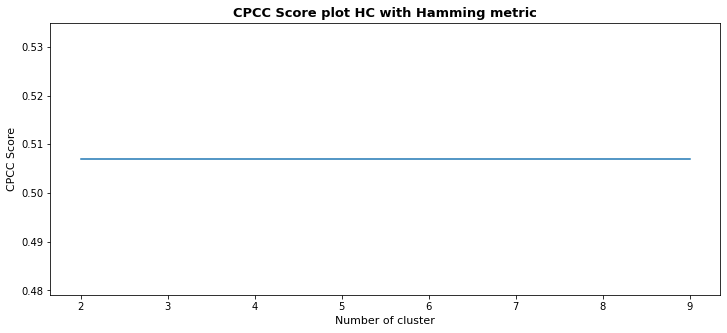

In [ ]:
sil_score = {}
cpcc = {}
Zd = sch.linkage(distance_matrix, method='average', metric='hamming')

for k in range(2, 10):
    ##https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
    hc = AgglomerativeClustering(n_clusters=k, affinity='precomputed', linkage='average').fit(distance_matrix)
    label = hc.labels_
    sil_score[k] = round(silhouette_score(distance_matrix, label, metric="precomputed"),3)
    ##https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html
    c, coph_dists = sch.cophenet(Zd, pdist(X4, metric="hamming"))
    cpcc[k] = round(c,3)

plt.figure(figsize=(12,5))
plt.plot(list(sil_score.keys()), list(sil_score.values()))
plt.xlabel("Number of cluster", fontsize=11)
plt.ylabel("Silhouette Coefficient", fontsize=11)
plt.title("Silhouette Score plot HC:Average linkage", fontsize=13, weight='bold')

plt.figure(figsize=(12,5))
plt.plot(list(cpcc.keys()), list(cpcc.values()))
plt.xlabel("Number of cluster", fontsize=11)
plt.ylabel("CPCC Score", fontsize=11)
plt.title("CPCC Score plot HC with Hamming metric", fontsize=13, weight='bold')

plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  This is separate from the ipykernel package so we can avoid doing imports until


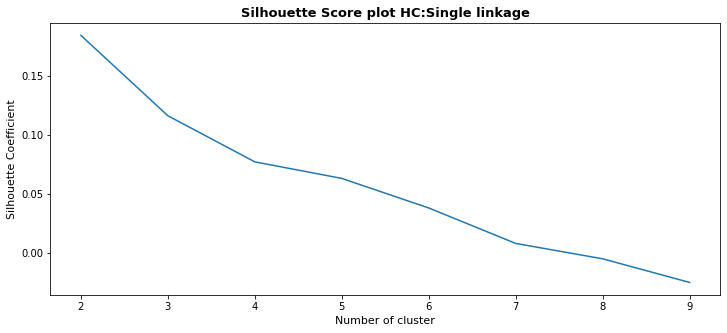

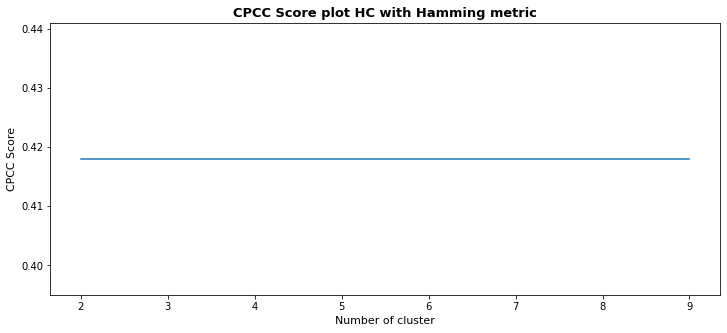

In [ ]:
sil_score = {}
cpcc = {}
Zd = sch.linkage(distance_matrix, method='single', metric='hamming')

for k in range(2, 10):
    ##https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
    hc = AgglomerativeClustering(n_clusters=k, affinity='precomputed', linkage='single').fit(distance_matrix)
    label = hc.labels_
    sil_score[k] = round(silhouette_score(distance_matrix, label, metric="precomputed"),3)
    ##https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html
    c, coph_dists = sch.cophenet(Zd, pdist(X4, metric="hamming"))
    cpcc[k] = round(c,3)

plt.figure(figsize=(12,5))
plt.plot(list(sil_score.keys()), list(sil_score.values()))
plt.xlabel("Number of cluster", fontsize=11)
plt.ylabel("Silhouette Coefficient", fontsize=11)
plt.title("Silhouette Score plot HC:Single linkage", fontsize=13, weight='bold')

plt.figure(figsize=(12,5))
plt.plot(list(cpcc.keys()), list(cpcc.values()))
plt.xlabel("Number of cluster", fontsize=11)
plt.ylabel("CPCC Score", fontsize=11)
plt.title("CPCC Score plot HC with Hamming metric", fontsize=13, weight='bold')

plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  This is separate from the ipykernel package so we can avoid doing imports until


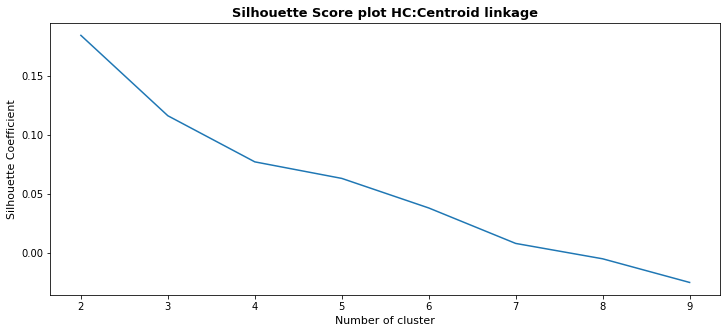

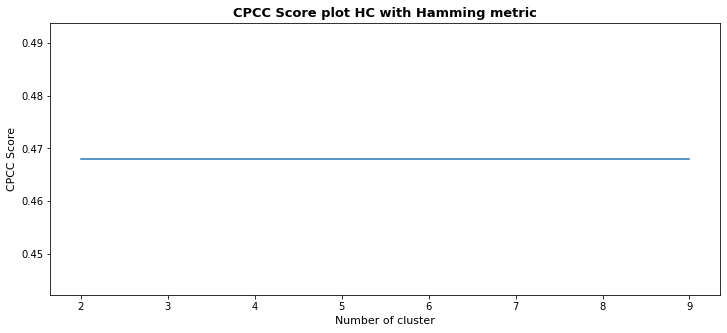

In [ ]:
sil_score = {}
cpcc = {}
Zd = sch.linkage(distance_matrix, method='centroid', metric='euclidean')

for k in range(2, 10):
    ##https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
    hc = AgglomerativeClustering(n_clusters=k, affinity='precomputed', linkage='single').fit(distance_matrix)
    label = hc.labels_
    sil_score[k] = round(silhouette_score(distance_matrix, label, metric="precomputed"),3)
    ##https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html
    c, coph_dists = sch.cophenet(Zd, pdist(X4, metric="hamming"))
    cpcc[k] = round(c,3)

plt.figure(figsize=(12,5))
plt.plot(list(sil_score.keys()), list(sil_score.values()))
plt.xlabel("Number of cluster", fontsize=11)
plt.ylabel("Silhouette Coefficient", fontsize=11)
plt.title("Silhouette Score plot HC:Centroid linkage", fontsize=13, weight='bold')

plt.figure(figsize=(12,5))
plt.plot(list(cpcc.keys()), list(cpcc.values()))
plt.xlabel("Number of cluster", fontsize=11)
plt.ylabel("CPCC Score", fontsize=11)
plt.title("CPCC Score plot HC with Hamming metric", fontsize=13, weight='bold')

plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  This is separate from the ipykernel package so we can avoid doing imports until


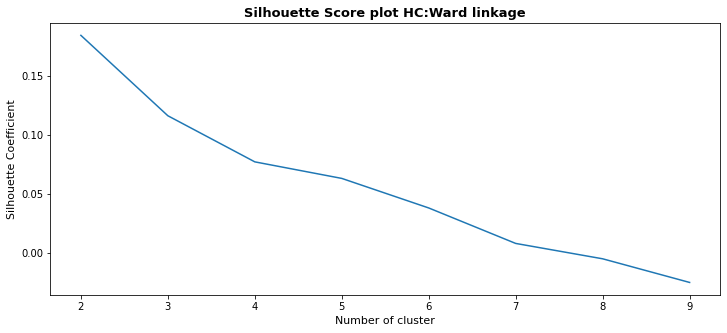

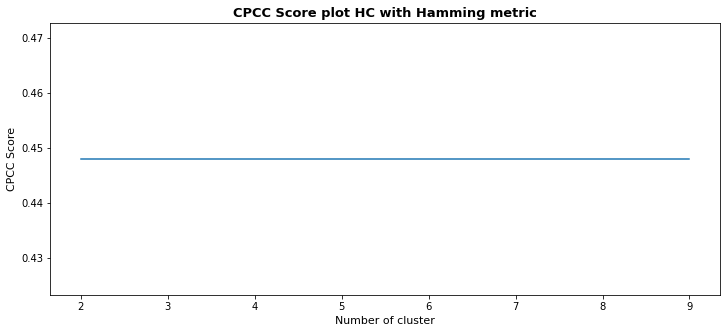

In [ ]:
sil_score = {}
cpcc = {}
Zd = sch.linkage(distance_matrix, method='ward', metric='euclidean')

for k in range(2, 10):
    ##https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
    hc = AgglomerativeClustering(n_clusters=k, affinity='precomputed', linkage='single').fit(distance_matrix)
    label = hc.labels_
    sil_score[k] = round(silhouette_score(distance_matrix, label, metric="precomputed"),3)
    ##https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html
    c, coph_dists = sch.cophenet(Zd, pdist(X4, metric="hamming"))
    cpcc[k] = round(c,3)

plt.figure(figsize=(12,5))
plt.plot(list(sil_score.keys()), list(sil_score.values()))
plt.xlabel("Number of cluster", fontsize=11)
plt.ylabel("Silhouette Coefficient", fontsize=11)
plt.title("Silhouette Score plot HC:Ward linkage", fontsize=13, weight='bold')

plt.figure(figsize=(12,5))
plt.plot(list(cpcc.keys()), list(cpcc.values()))
plt.xlabel("Number of cluster", fontsize=11)
plt.ylabel("CPCC Score", fontsize=11)
plt.title("CPCC Score plot HC with Hamming metric", fontsize=13, weight='bold')

plt.show()

**K-MODES**

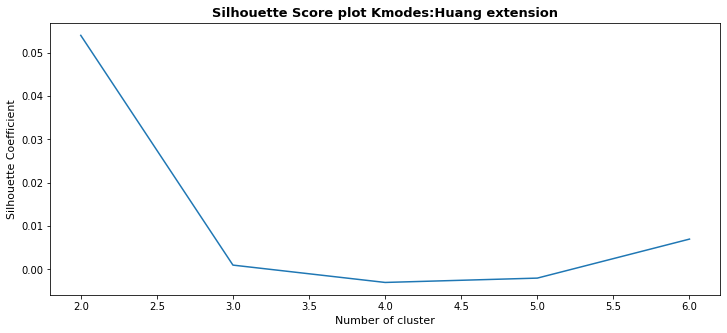

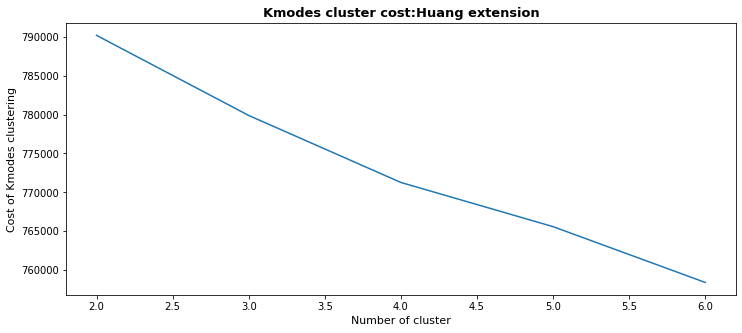

In [ ]:
sil_score = {}
kmcost = {}

for k in range(2, 7):
    ##https://pypi.org/project/kmodes/
    km = KModes(n_clusters=k, init='Huang', n_init=5, verbose=0).fit(distance_matrix)
    label = km.labels_
    sil_score[k] = round(silhouette_score(distance_matrix, label, metric="precomputed"),3)
    kmcost[k] = km.cost_

plt.figure(figsize=(12,5))
plt.plot(list(sil_score.keys()), list(sil_score.values()))
plt.xlabel("Number of cluster", fontsize=11)
plt.ylabel("Silhouette Coefficient", fontsize=11)
plt.title("Silhouette Score plot Kmodes:Huang extension", fontsize=13, weight='bold')

plt.figure(figsize=(12,5))
plt.plot(list(kmcost.keys()), list(kmcost.values()))
plt.xlabel("Number of cluster", fontsize=11)
plt.ylabel("Cost of Kmodes clustering", fontsize=11)
plt.title("Kmodes cluster cost:Huang extension", fontsize=13, weight='bold')

plt.show()

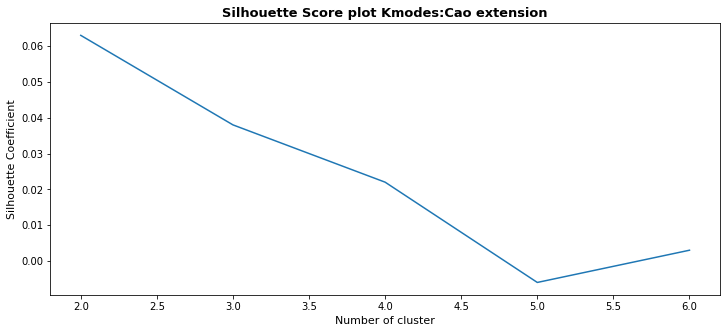

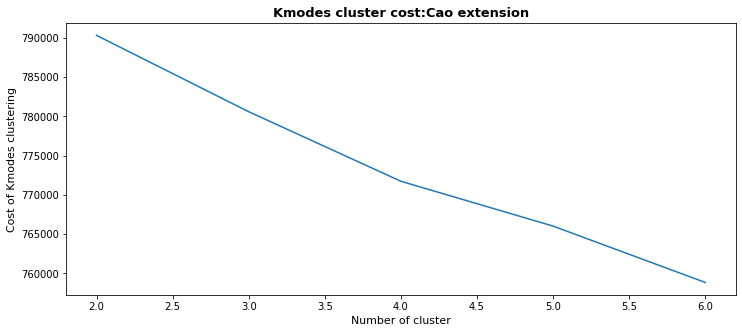

In [ ]:
sil_score = {}
kmcost = {}

for k in range(2, 7):
    ##https://pypi.org/project/kmodes/
    km = KModes(n_clusters=k, init='Cao', n_init=5, verbose=0).fit(distance_matrix)
    label = km.labels_
    sil_score[k] = round(silhouette_score(distance_matrix, label, metric="precomputed"),3)
    kmcost[k] = km.cost_

plt.figure(figsize=(12,5))
plt.plot(list(sil_score.keys()), list(sil_score.values()))
plt.xlabel("Number of cluster", fontsize=11)
plt.ylabel("Silhouette Coefficient", fontsize=11)
plt.title("Silhouette Score plot Kmodes:Cao extension", fontsize=13, weight='bold')

plt.figure(figsize=(12,5))
plt.plot(list(kmcost.keys()), list(kmcost.values()))
plt.xlabel("Number of cluster", fontsize=11)
plt.ylabel("Cost of Kmodes clustering", fontsize=11)
plt.title("Kmodes cluster cost:Cao extension", fontsize=13, weight='bold')

plt.show()

**DBSCAN**

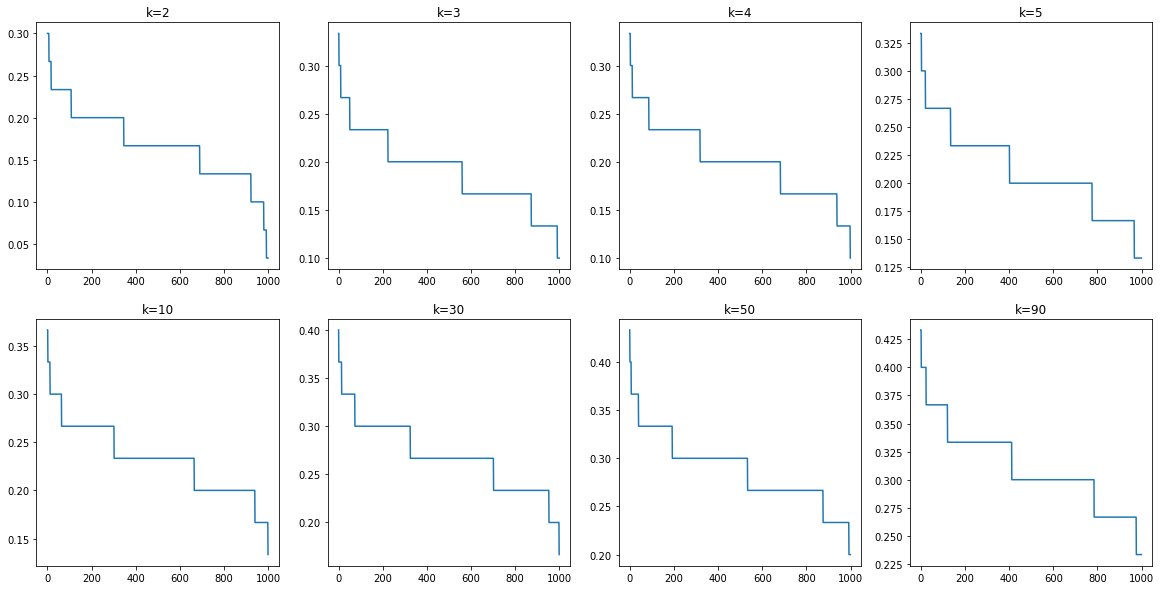

In [ ]:
##Source code: Professor Srikumar Krishnamoorthy-IIMA Faculty
##https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc
fig = plt.figure(figsize=(20,10))
i = 1
for k in [2,3,4,5,10,30,50,90]:
    neigh = NearestNeighbors(n_neighbors=k, metric='precomputed')
    nbrs = neigh.fit(distance_matrix)
    distances, indices = nbrs.kneighbors(distance_matrix)
    distances = np.sort(distances, axis=0)[::-1] #sort in descending order
    plt.subplot(2, 4, i)
    i += 1
    plt.plot(distances[:,k-1])
    plt.title("k="+str(k))

In [ ]:
db = DBSCAN(eps=0.24, min_samples=4, metric='precomputed').fit(distance_matrix)

In [ ]:
# db.labels_

**Kmediods Clustering**

_Due to kmeanss++ initializer the optimal cluster count may change on next run__

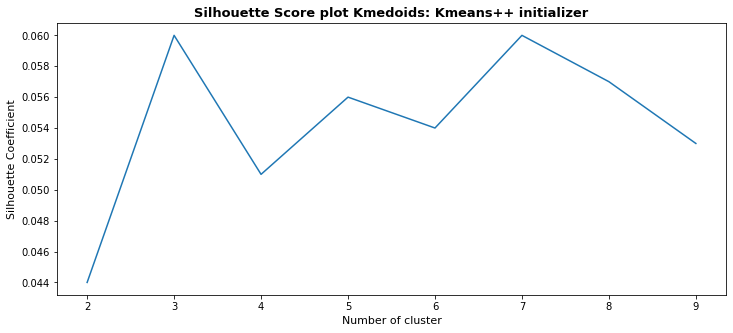

In [ ]:
distance_matrix1 = distance_matrix + np.transpose(distance_matrix)
sil_score = {}

for k in range(2, 10):
    # Prepare initial centers
    medoids = kmeans_plusplus_initializer(distance_matrix1, k).initialize(return_index=True)
    # Perform cluster analysis
    kmedoids_instance = kmedoids(distance_matrix1, medoids, data_type='distance_matrix')
    clusters = kmedoids_instance.process().get_clusters()
    med = kmedoids_instance.get_medoids()
    score = silhouette(distance_matrix1, clusters).process().get_score()
    
    # by default kmedoids returns representation CLUSTER_INDEX_LIST_SEPARATION
    type_repr = kmedoids_instance.get_cluster_encoding();
    encoder = cluster_encoder(type_repr, clusters, distance_matrix1);
    encoder.set_encoding(type_encoding.CLUSTER_INDEX_LABELING);
    # print("Index Labeling:", encoder.get_clusters())
    labels = encoder.get_clusters()
    sil_score[k] = round(silhouette_score(distance_matrix1, labels, metric="precomputed"),3)

plt.figure(figsize=(12,5))
plt.plot(list(sil_score.keys()), list(sil_score.values()))
plt.xlabel("Number of cluster", fontsize=11)
plt.ylabel("Silhouette Coefficient", fontsize=11)
plt.title("Silhouette Score plot Kmedoids: Kmeans++ initializer", fontsize=13, weight='bold')


plt.show()

In [ ]:
Zd = sch.linkage(distance_matrix, method='average', metric='hamming')
hc = AgglomerativeClustering(n_clusters=2, affinity='precomputed', linkage='average').fit(distance_matrix)
label_hc = hc.labels_

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


In [ ]:
km = KModes(n_clusters=2, init='Cao', n_init=2, verbose=0).fit(distance_matrix)
label_km = km.labels_

In [ ]:
# Prepare initial centers
medoids = kmeans_plusplus_initializer(distance_matrix1, 3).initialize(return_index=True)
# Perform cluster analysis
kmedoids_instance = kmedoids(distance_matrix1, medoids, data_type='distance_matrix')
clusters = kmedoids_instance.process().get_clusters()
med = kmedoids_instance.get_medoids()
score = silhouette(distance_matrix1, clusters).process().get_score()
 
# by default kmedoids returns representation CLUSTER_INDEX_LIST_SEPARATION
type_repr = kmedoids_instance.get_cluster_encoding();
encoder = cluster_encoder(type_repr, clusters, distance_matrix1);
encoder.set_encoding(type_encoding.CLUSTER_INDEX_LABELING);
# print("Index Labeling:", encoder.get_clusters())
label_kmediods = encoder.get_clusters()

In [ ]:
a = pd.DataFrame(list(label_hc), columns=['id_hc'])
b = pd.DataFrame(list(label_km), columns=['id_kmodes'])
c = pd.DataFrame(list(label_kmediods), columns=['id_kmediods'])

In [ ]:
results = pd.concat([a, b, c], axis=1)

In [ ]:
results.id_hc.value_counts().sort_index()

0      5
1    995
Name: id_hc, dtype: int64

In [ ]:
results.id_kmodes.value_counts().sort_index()

0    516
1    484
Name: id_kmodes, dtype: int64

In [ ]:
results.id_kmediods.value_counts().sort_index()

0    373
1    195
2    432
Name: id_kmediods, dtype: int64

In [ ]:
explore_data = pd.merge(results, dataset, left_index=True, right_index=True)

In [ ]:
explore_data.head()

,id_hc,id_kmodes,id_kmediods,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO_TV,EDUCATION,RETRAINING,AMOUNT,SAV_ACCT,EMPLOYMENT,INSTALL_RATE,MALE_DIV,MALE_SINGLE,MALE_MAR_or_WID,CO_APPLICANT,GUARANTOR,PRESENT_RESIDENT,REAL_ESTATE,PROP_UNKN_NONE,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN
0,1,0,0,0,6,4,0,0,0,1,0,0,1169,4,4,4,0,1,0,0,0,4,1,0,67,0,0,1,2,2,1,1,0
1,1,1,2,3,12,4,0,0,0,0,1,0,2096,0,3,2,0,1,0,0,0,3,1,0,49,0,0,1,1,1,2,0,0
2,1,1,1,0,42,2,0,0,1,0,0,0,7882,0,3,2,0,1,0,0,1,4,0,0,45,0,0,0,1,2,2,0,0
3,1,1,0,3,36,2,0,0,0,0,1,0,9055,4,2,2,0,1,0,0,0,4,0,1,35,0,0,0,1,1,2,1,0
4,1,0,0,3,24,2,0,0,1,0,0,0,2835,2,4,3,0,1,0,0,0,4,0,0,53,0,0,1,1,2,1,0,0


**Find top attributes to characterise**

In [ ]:
sc = StandardScaler()
X4_sc = pd.DataFrame(sc.fit_transform(X4))
X4_sc.columns = X4.columns
X4_sc['id_kmediods'] = label_kmediods

In [ ]:
df_mean = (X4_sc.loc[: , :].groupby('id_kmediods').mean())
results = pd.DataFrame(columns=['Variable', 'Var'])
for column in df_mean.columns[1:]:
    results.loc[len(results), :] = [column, np.var(df_mean[column])]

selected_columns = list(results.sort_values('Var', ascending=False).Variable.values) + ['id_kmediods']

In [ ]:
selected_columns[0:11]

['RENT',
 'OWN_RES',
 'MALE_SINGLE',
 'FURNITURE',
 'EMPLOYMENT',
 'PRESENT_RESIDENT',
 'TELEPHONE',
 'RADIO_TV',
 'INSTALL_RATE',
 'HISTORY',
 'DURATION']

**Compare K-mediods**

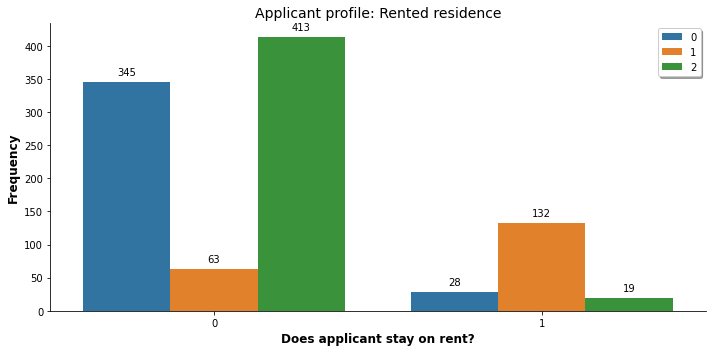

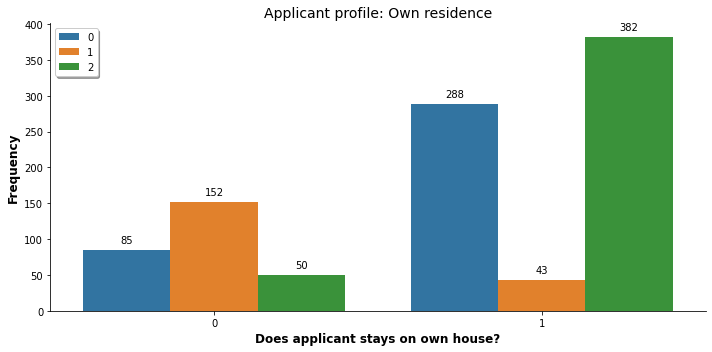

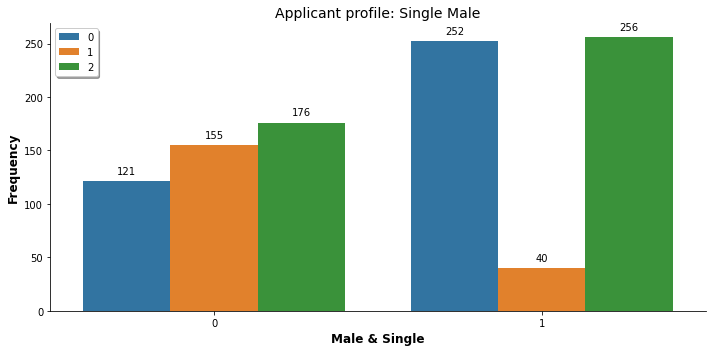

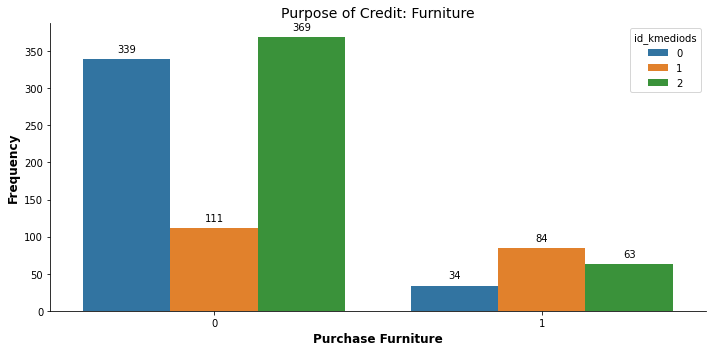

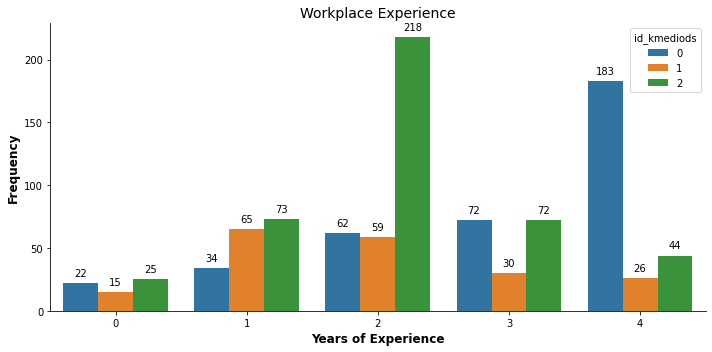

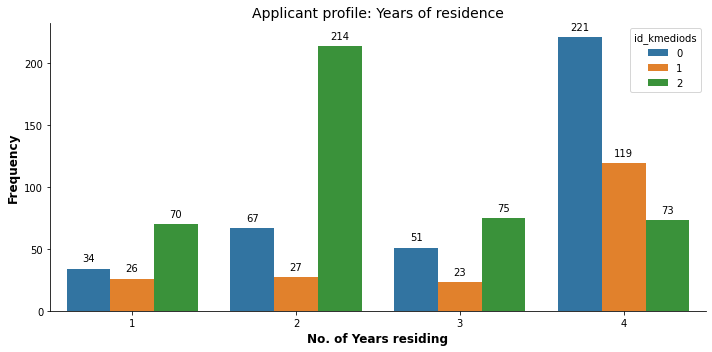

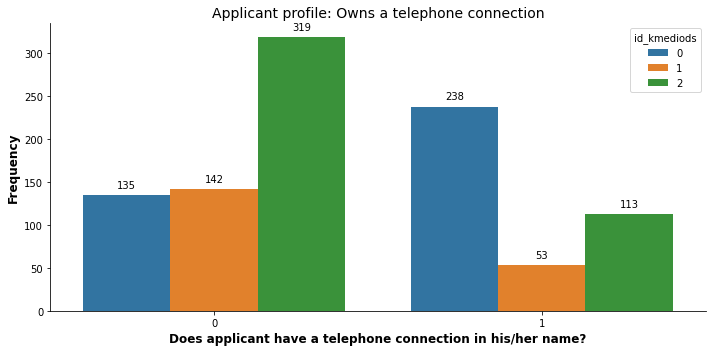

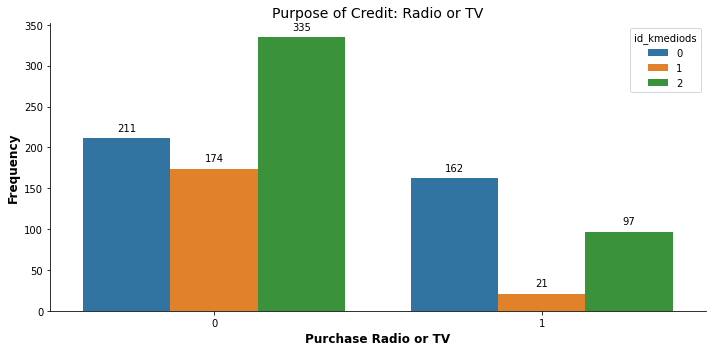

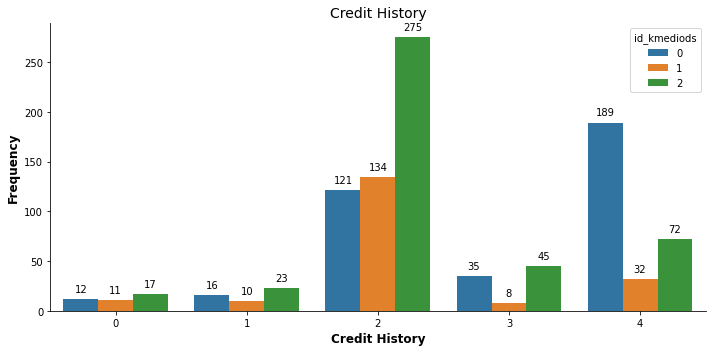

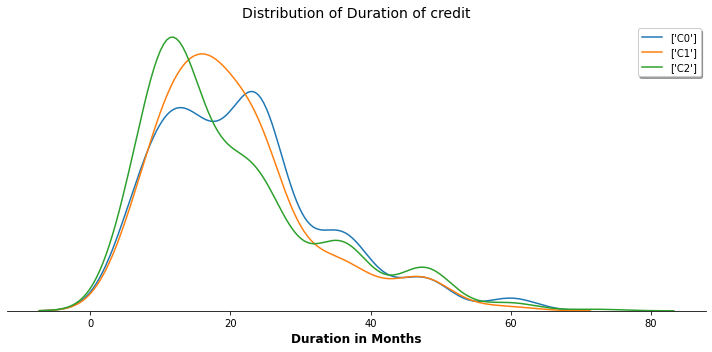

In [ ]:
fig, axes = plt.subplots(figsize=(10,5))
fig.subplots_adjust(top=0.7)
splot = sns.countplot(x='RENT', data=explore_data, hue='id_kmediods', ax=axes);
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_title('Applicant profile: Rented residence', fontsize=14)
axes.set_xlabel('Does applicant stay on rent?', fontsize=12, weight='bold')
axes.set_ylabel('Frequency', fontsize=12, weight='bold')

##Source Code: Start
##Link : https://github.com/mwaskom/seaborn/issues/1582
for p in splot.patches:
    splot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2.,
         p.get_height()), ha = 'center', va = 'center',
        xytext = (0, 10), textcoords = 'offset points')
##Source Code: End
axes.legend(loc='best', shadow=True,fontsize='medium')
fig.tight_layout()
plt.show()

fig, axes = plt.subplots(figsize=(10,5))
fig.subplots_adjust(top=0.7)
splot = sns.countplot(x='OWN_RES', data=explore_data, hue='id_kmediods', ax=axes);
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_title('Applicant profile: Own residence', fontsize=14)
axes.set_xlabel('Does applicant stays on own house?', fontsize=12, weight='bold')
axes.set_ylabel('Frequency', fontsize=12, weight='bold')

##Source Code: Start
##Link : https://github.com/mwaskom/seaborn/issues/1582
for p in splot.patches:
    splot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2.,
         p.get_height()), ha = 'center', va = 'center',
        xytext = (0, 10), textcoords = 'offset points')
##Source Code: End
axes.legend(loc='best', shadow=True,fontsize='medium')
fig.tight_layout()
plt.show()

fig, axes = plt.subplots(figsize=(10,5))
fig.subplots_adjust(top=0.7)
splot = sns.countplot(x='MALE_SINGLE', data=explore_data, hue='id_kmediods', ax=axes);
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_title('Applicant profile: Single Male', fontsize=14)
axes.set_xlabel('Male & Single', fontsize=12, weight='bold')
axes.set_ylabel('Frequency', fontsize=12, weight='bold')

##Source Code: Start
##Link : https://github.com/mwaskom/seaborn/issues/1582
for p in splot.patches:
    splot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2.,
         p.get_height()), ha = 'center', va = 'center',
        xytext = (0, 10), textcoords = 'offset points')
##Source Code: End
axes.legend(loc='best', shadow=True,fontsize='medium')
fig.tight_layout()
plt.show()

fig, axes = plt.subplots(figsize=(10,5))
fig.subplots_adjust(top=0.7)
splot = sns.countplot(x='FURNITURE', data=explore_data, hue='id_kmediods', ax=axes);
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_title('Purpose of Credit: Furniture', fontsize=14)
axes.set_xlabel('Purchase Furniture', fontsize=12, weight='bold')
axes.set_ylabel('Frequency', fontsize=12, weight='bold')
##Source Code: Start
##Link : https://github.com/mwaskom/seaborn/issues/1582
for p in splot.patches:
    splot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2.,
         p.get_height()), ha = 'center', va = 'center',
        xytext = (0, 10), textcoords = 'offset points')
##Source Code: End
fig.tight_layout()
plt.show()

fig, axes = plt.subplots(figsize=(10,5))
fig.subplots_adjust(top=0.7)
splot = sns.countplot(x='EMPLOYMENT', data=explore_data, hue='id_kmediods', ax=axes);
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_title('Workplace Experience', fontsize=14)
axes.set_xlabel('Years of Experience', fontsize=12, weight='bold')
axes.set_ylabel('Frequency', fontsize=12, weight='bold')
##Source Code: Start
##Link : https://github.com/mwaskom/seaborn/issues/1582
for p in splot.patches:
    splot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2.,
         p.get_height()), ha = 'center', va = 'center',
        xytext = (0, 10), textcoords = 'offset points')
##Source Code: End
fig.tight_layout()
plt.show()

fig, axes = plt.subplots(figsize=(10,5))
fig.subplots_adjust(top=0.7)
splot = sns.countplot(x='PRESENT_RESIDENT', data=explore_data, hue='id_kmediods', ax=axes);
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_title('Applicant profile: Years of residence', fontsize=14)
axes.set_xlabel('No. of Years residing', fontsize=12, weight='bold')
axes.set_ylabel('Frequency', fontsize=12, weight='bold')
##Source Code: Start
##Link : https://github.com/mwaskom/seaborn/issues/1582
for p in splot.patches:
    splot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2.,
         p.get_height()), ha = 'center', va = 'center',
        xytext = (0, 10), textcoords = 'offset points')
##Source Code: End
fig.tight_layout()
plt.show()

fig, axes = plt.subplots(figsize=(10,5))
fig.subplots_adjust(top=0.7)
splot = sns.countplot(x='TELEPHONE', data=explore_data, hue='id_kmediods', ax=axes);
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_title('Applicant profile: Owns a telephone connection', fontsize=14)
axes.set_xlabel('Does applicant have a telephone connection in his/her name?', fontsize=12, weight='bold')
axes.set_ylabel('Frequency', fontsize=12, weight='bold')
##Source Code: Start
##Link : https://github.com/mwaskom/seaborn/issues/1582
for p in splot.patches:
    splot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2.,
         p.get_height()), ha = 'center', va = 'center',
        xytext = (0, 10), textcoords = 'offset points')
##Source Code: End
fig.tight_layout()
plt.show()

fig, axes = plt.subplots(figsize=(10,5))
fig.subplots_adjust(top=0.7)
splot = sns.countplot(x='RADIO_TV', data=explore_data, hue='id_kmediods', ax=axes);
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_title('Purpose of Credit: Radio or TV', fontsize=14)
axes.set_xlabel('Purchase Radio or TV', fontsize=12, weight='bold')
axes.set_ylabel('Frequency', fontsize=12, weight='bold')
##Source Code: Start
##Link : https://github.com/mwaskom/seaborn/issues/1582
for p in splot.patches:
    splot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2.,
         p.get_height()), ha = 'center', va = 'center',
        xytext = (0, 10), textcoords = 'offset points')
##Source Code: End
fig.tight_layout()
plt.show()

fig, axes = plt.subplots(figsize=(10,5))
fig.subplots_adjust(top=0.7)
splot = sns.countplot(x='HISTORY', data=explore_data, hue='id_kmediods', ax=axes);
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_title('Credit History', fontsize=14)
axes.set_xlabel('Credit History', fontsize=12, weight='bold')
axes.set_ylabel('Frequency', fontsize=12, weight='bold')
##Source Code: Start
##Link : https://github.com/mwaskom/seaborn/issues/1582
for p in splot.patches:
    splot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2.,
         p.get_height()), ha = 'center', va = 'center',
        xytext = (0, 10), textcoords = 'offset points')
##Source Code: End
fig.tight_layout()
plt.show()

fig, axes = plt.subplots(figsize=(10,5))
fig.subplots_adjust(top=0.7)
sns.kdeplot(explore_data.loc[explore_data.id_kmediods==0, 'DURATION'], ax=axes, label=['C0']);
sns.kdeplot(explore_data.loc[explore_data.id_kmediods==1, 'DURATION'], ax=axes, label=['C1']);
sns.kdeplot(explore_data.loc[explore_data.id_kmediods==2, 'DURATION'], ax=axes, label=['C2']);
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.spines['left'].set_visible(False)
axes.axes.get_yaxis().set_visible(False)
axes.set_title('Distribution of Duration of credit', fontsize=14)
axes.set_xlabel('Duration in Months', fontsize=12, weight='bold')
axes.legend(loc='best', shadow=True,fontsize='medium')
fig.tight_layout()
plt.show()

In [ ]:
X4_sc['id_kmodes'] = label_km

In [ ]:
df_mean = (X4_sc.loc[: , :].groupby('id_kmodes').mean())
results = pd.DataFrame(columns=['Variable', 'Var'])
for column in df_mean.columns[1:]:
    results.loc[len(results), :] = [column, np.var(df_mean[column])]

selected_columns = list(results.sort_values('Var', ascending=False).Variable.values) + ['id_kmodes']

In [ ]:
selected_columns[0:12]

['OWN_RES',
 'RENT',
 'PROP_UNKN_NONE',
 'JOB',
 'NUM_DEPENDENTS',
 'OTHER_INSTALL',
 'RADIO_TV',
 'MALE_MAR_or_WID',
 'MALE_DIV',
 'MALE_SINGLE',
 'PRESENT_RESIDENT',
 'NUM_CREDITS']

**Compare same attributes with kmodes**

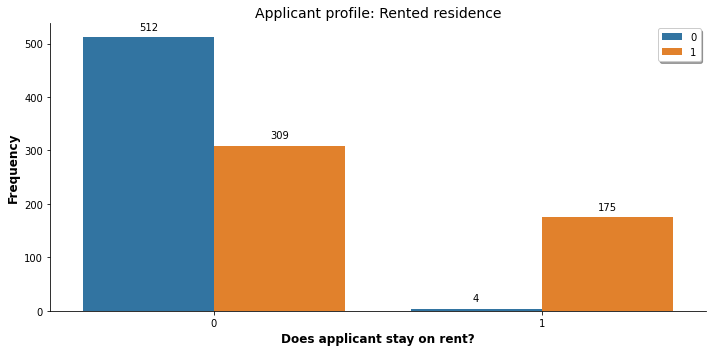

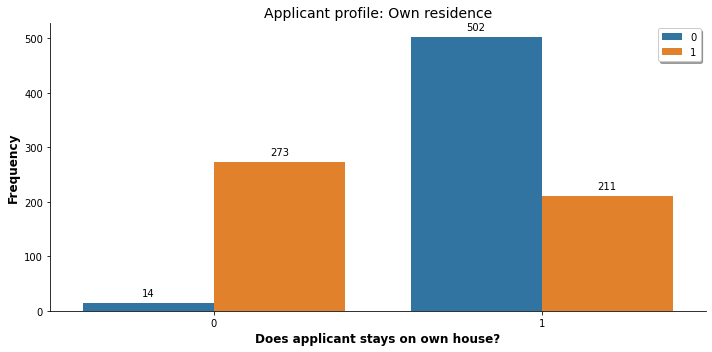

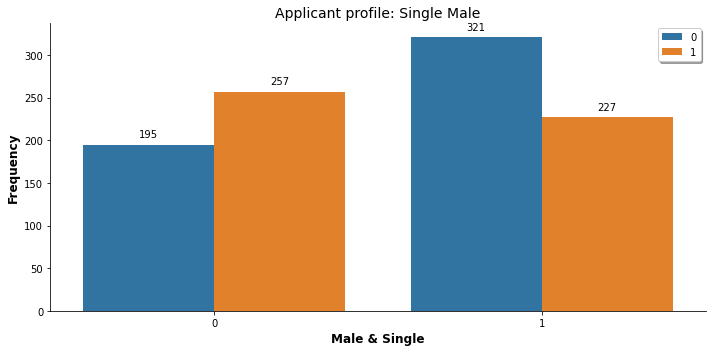

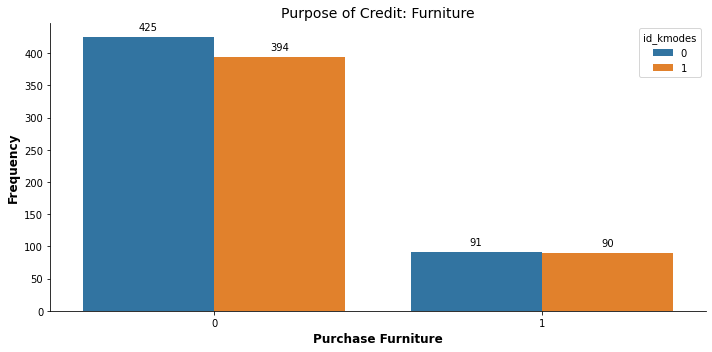

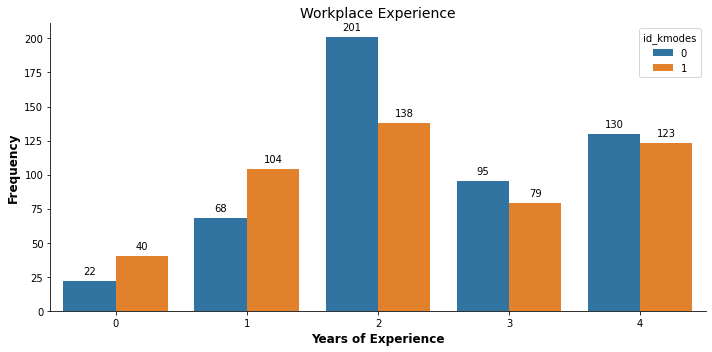

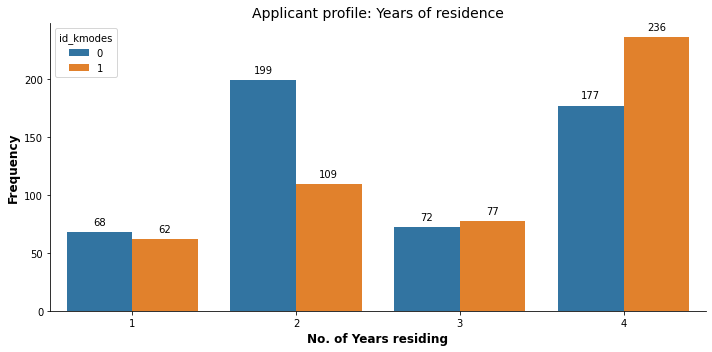

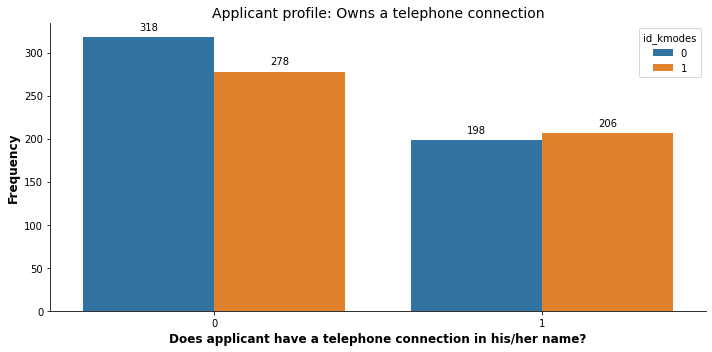

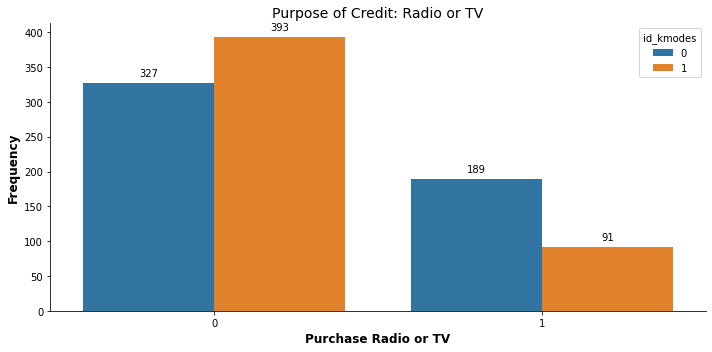

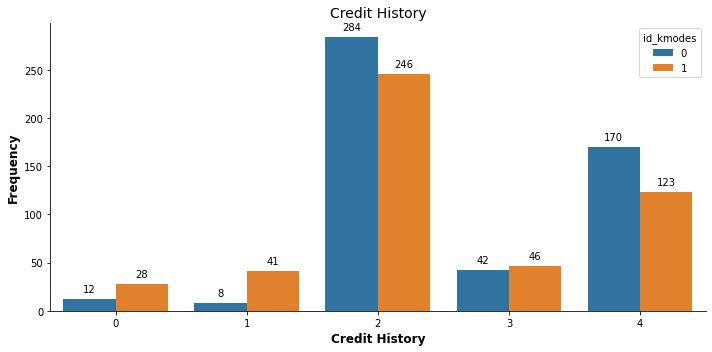

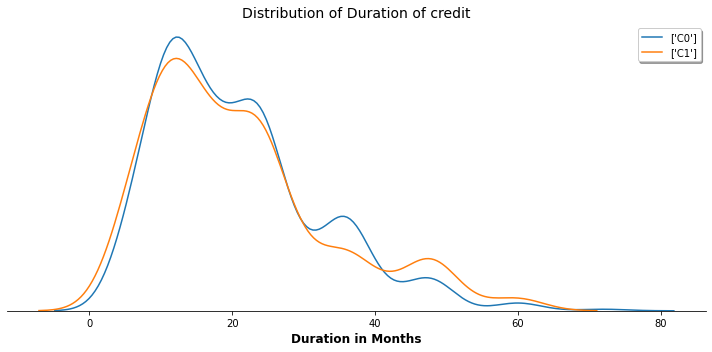

In [ ]:
fig, axes = plt.subplots(figsize=(10,5))
fig.subplots_adjust(top=0.7)
splot = sns.countplot(x='RENT', data=explore_data, hue='id_kmodes', ax=axes);
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_title('Applicant profile: Rented residence', fontsize=14)
axes.set_xlabel('Does applicant stay on rent?', fontsize=12, weight='bold')
axes.set_ylabel('Frequency', fontsize=12, weight='bold')

##Source Code: Start
##Link : https://github.com/mwaskom/seaborn/issues/1582
for p in splot.patches:
    splot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2.,
         p.get_height()), ha = 'center', va = 'center',
        xytext = (0, 10), textcoords = 'offset points')
##Source Code: End
axes.legend(loc='best', shadow=True,fontsize='medium')
fig.tight_layout()
plt.show()

fig, axes = plt.subplots(figsize=(10,5))
fig.subplots_adjust(top=0.7)
splot = sns.countplot(x='OWN_RES', data=explore_data, hue='id_kmodes', ax=axes);
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_title('Applicant profile: Own residence', fontsize=14)
axes.set_xlabel('Does applicant stays on own house?', fontsize=12, weight='bold')
axes.set_ylabel('Frequency', fontsize=12, weight='bold')

##Source Code: Start
##Link : https://github.com/mwaskom/seaborn/issues/1582
for p in splot.patches:
    splot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2.,
         p.get_height()), ha = 'center', va = 'center',
        xytext = (0, 10), textcoords = 'offset points')
##Source Code: End
axes.legend(loc='best', shadow=True,fontsize='medium')
fig.tight_layout()
plt.show()

fig, axes = plt.subplots(figsize=(10,5))
fig.subplots_adjust(top=0.7)
splot = sns.countplot(x='MALE_SINGLE', data=explore_data, hue='id_kmodes', ax=axes);
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_title('Applicant profile: Single Male', fontsize=14)
axes.set_xlabel('Male & Single', fontsize=12, weight='bold')
axes.set_ylabel('Frequency', fontsize=12, weight='bold')

##Source Code: Start
##Link : https://github.com/mwaskom/seaborn/issues/1582
for p in splot.patches:
    splot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2.,
         p.get_height()), ha = 'center', va = 'center',
        xytext = (0, 10), textcoords = 'offset points')
##Source Code: End
axes.legend(loc='best', shadow=True,fontsize='medium')
fig.tight_layout()
plt.show()

fig, axes = plt.subplots(figsize=(10,5))
fig.subplots_adjust(top=0.7)
splot = sns.countplot(x='FURNITURE', data=explore_data, hue='id_kmodes', ax=axes);
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_title('Purpose of Credit: Furniture', fontsize=14)
axes.set_xlabel('Purchase Furniture', fontsize=12, weight='bold')
axes.set_ylabel('Frequency', fontsize=12, weight='bold')
##Source Code: Start
##Link : https://github.com/mwaskom/seaborn/issues/1582
for p in splot.patches:
    splot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2.,
         p.get_height()), ha = 'center', va = 'center',
        xytext = (0, 10), textcoords = 'offset points')
##Source Code: End
fig.tight_layout()
plt.show()

fig, axes = plt.subplots(figsize=(10,5))
fig.subplots_adjust(top=0.7)
splot = sns.countplot(x='EMPLOYMENT', data=explore_data, hue='id_kmodes', ax=axes);
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_title('Workplace Experience', fontsize=14)
axes.set_xlabel('Years of Experience', fontsize=12, weight='bold')
axes.set_ylabel('Frequency', fontsize=12, weight='bold')
##Source Code: Start
##Link : https://github.com/mwaskom/seaborn/issues/1582
for p in splot.patches:
    splot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2.,
         p.get_height()), ha = 'center', va = 'center',
        xytext = (0, 10), textcoords = 'offset points')
##Source Code: End
fig.tight_layout()
plt.show()

fig, axes = plt.subplots(figsize=(10,5))
fig.subplots_adjust(top=0.7)
splot = sns.countplot(x='PRESENT_RESIDENT', data=explore_data, hue='id_kmodes', ax=axes);
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_title('Applicant profile: Years of residence', fontsize=14)
axes.set_xlabel('No. of Years residing', fontsize=12, weight='bold')
axes.set_ylabel('Frequency', fontsize=12, weight='bold')
##Source Code: Start
##Link : https://github.com/mwaskom/seaborn/issues/1582
for p in splot.patches:
    splot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2.,
         p.get_height()), ha = 'center', va = 'center',
        xytext = (0, 10), textcoords = 'offset points')
##Source Code: End
fig.tight_layout()
plt.show()

fig, axes = plt.subplots(figsize=(10,5))
fig.subplots_adjust(top=0.7)
splot = sns.countplot(x='TELEPHONE', data=explore_data, hue='id_kmodes', ax=axes);
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_title('Applicant profile: Owns a telephone connection', fontsize=14)
axes.set_xlabel('Does applicant have a telephone connection in his/her name?', fontsize=12, weight='bold')
axes.set_ylabel('Frequency', fontsize=12, weight='bold')
##Source Code: Start
##Link : https://github.com/mwaskom/seaborn/issues/1582
for p in splot.patches:
    splot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2.,
         p.get_height()), ha = 'center', va = 'center',
        xytext = (0, 10), textcoords = 'offset points')
##Source Code: End
fig.tight_layout()
plt.show()

fig, axes = plt.subplots(figsize=(10,5))
fig.subplots_adjust(top=0.7)
splot = sns.countplot(x='RADIO_TV', data=explore_data, hue='id_kmodes', ax=axes);
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_title('Purpose of Credit: Radio or TV', fontsize=14)
axes.set_xlabel('Purchase Radio or TV', fontsize=12, weight='bold')
axes.set_ylabel('Frequency', fontsize=12, weight='bold')
##Source Code: Start
##Link : https://github.com/mwaskom/seaborn/issues/1582
for p in splot.patches:
    splot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2.,
         p.get_height()), ha = 'center', va = 'center',
        xytext = (0, 10), textcoords = 'offset points')
##Source Code: End
fig.tight_layout()
plt.show()

fig, axes = plt.subplots(figsize=(10,5))
fig.subplots_adjust(top=0.7)
splot = sns.countplot(x='HISTORY', data=explore_data, hue='id_kmodes', ax=axes);
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_title('Credit History', fontsize=14)
axes.set_xlabel('Credit History', fontsize=12, weight='bold')
axes.set_ylabel('Frequency', fontsize=12, weight='bold')
##Source Code: Start
##Link : https://github.com/mwaskom/seaborn/issues/1582
for p in splot.patches:
    splot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2.,
         p.get_height()), ha = 'center', va = 'center',
        xytext = (0, 10), textcoords = 'offset points')
##Source Code: End
fig.tight_layout()
plt.show()

fig, axes = plt.subplots(figsize=(10,5))
fig.subplots_adjust(top=0.7)
sns.kdeplot(explore_data.loc[explore_data.id_kmodes==0, 'DURATION'], ax=axes, label=['C0']);
sns.kdeplot(explore_data.loc[explore_data.id_kmodes==1, 'DURATION'], ax=axes, label=['C1']);
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.spines['left'].set_visible(False)
axes.axes.get_yaxis().set_visible(False)
axes.set_title('Distribution of Duration of credit', fontsize=14)
axes.set_xlabel('Duration in Months', fontsize=12, weight='bold')
axes.legend(loc='best', shadow=True,fontsize='medium')
fig.tight_layout()
plt.show()

In [ ]:
# code you want to evaluate
elapsed = timeit.default_timer() - start_time
elapsed

648.803644806

**Thank You**